## Lead Scoring Case Study

## Problem Statement
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines. When people fill up a form providing their email address or phone number, they are classified to be a lead. Once these leads are acquired, employees from the sales team start the process of getting the leads on board their education program. Through this process, some of the leads get converted while most do not. 

The lead conversion rate of X Education is very poor. If they successfully identify the set of leads that are hot leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

**Aim:**
To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Data Loading and Data Preparation

In [2]:
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

#### Inspect the Dataframe

In [3]:
# Shape of the dataframe
lead_df.shape

(9240, 37)

In [4]:
# Information on columns and data types
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

So there are 9240 rows and 37 columns in the dataframe. 

In [5]:
# Check the summary for the numeric columns 

lead_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
#Columns which are having lesser number of unique values can be considered as categorical columns .

lead_df.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [7]:
# Finding all the categorical columns in the dataframe
cat_col = [key for key in dict(lead_df.dtypes)
             if dict(lead_df.dtypes)[key] in ['object'] ] # Categorical Varible
print(cat_col)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [8]:
#Finding columns which has its values as select, as the value is not selected by the user "select" is stored in the data which can be treated as null 

select_cols =[]
for i in cat_col:
    if any(lead_df[i] == 'Select'):
        select_cols.append(i)
select_cols

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [9]:
# Replacing the 'Select' values in these 4 columns with Nan:
for col in select_cols:
    lead_df[col].replace('Select', np.NaN, inplace=True)

In [10]:
# Checking if the Select values have been replaced correctly
lead_df.loc[lead_df['City'] == 'Select']

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

In [11]:
# Checking if the Select values have been replaced correctly
lead_df.loc[lead_df['Specialization'] == 'Select']

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

In [12]:
# Checking if the Select values have been replaced correctly
lead_df.loc[lead_df['How did you hear about X Education'] == 'Select']

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

In [13]:
# Checking if the Select values have been replaced correctly
lead_df.loc[lead_df['Lead Profile'] == 'Select']

Empty DataFrame
Columns: [Prospect ID, Lead Number, Lead Origin, Lead Source, Do Not Email, Do Not Call, Converted, TotalVisits, Total Time Spent on Website, Page Views Per Visit, Last Activity, Country, Specialization, How did you hear about X Education, What is your current occupation, What matters most to you in choosing a course, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Lead Quality, Update me on Supply Chain Content, Get updates on DM Content, Lead Profile, City, Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score, I agree to pay the amount through cheque, A free copy of Mastering The Interview, Last Notable Activity]
Index: []

[0 rows x 37 columns]

In [14]:
# Percentage of missing values
percent_missing = lead_df.isnull().sum() * 100 / len(lead_df)

percent_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [15]:
# Listing the columns which have a high percentage of missing values (>=45%)

percent_missing[percent_missing.values >= 45]

How did you hear about X Education    78.463203
Lead Quality                          51.590909
Lead Profile                          74.188312
Asymmetrique Activity Index           45.649351
Asymmetrique Profile Index            45.649351
Asymmetrique Activity Score           45.649351
Asymmetrique Profile Score            45.649351
dtype: float64

In [16]:
#count of features having missing values 

percent_missing[percent_missing.values >= 45].count()

7

In [17]:
lead_df.shape

(9240, 37)

#### Checking number of columns before dropping : 37

In [18]:
# Dropping columns with >=45 % missing values

dropcol = list(percent_missing[percent_missing.values>=45].index)
# Check number of columns before dropping : 37
lead_df.drop(labels=dropcol, axis=1, inplace=True)

In [19]:
percent_missing = lead_df.isnull().sum() * 100 / len(lead_df)
percent_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

For all remaining features the percentage of missing values is lesser than 45%

In [20]:
lead_df.shape

(9240, 30)

#### Checking number of columns after dropping : 30. 
##### 7 columns have been dropped

In [21]:
# Check if column is dropped
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [22]:
#Dropping columns which are score related variables and assigned by the sales team or which are irrelevant to our problem statement

lead_df.drop(['Lead Number','Tags'],axis = 1,inplace=True)

In [23]:
lead_df.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
lead_df.shape

(9240, 28)

In [25]:
# Finding the remaining categorical columns in the dataframe
cat_col = [key for key in dict(lead_df.dtypes)
             if dict(lead_df.dtypes)[key] in ['object'] ] # Categorical Varible
print(cat_col)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [26]:
# Checking the value counts for object data type.

for i in cat_col:
    print(lead_df[i].value_counts(), end = '\n\n')
    print('*'*50,end ='\n\n')

3fe0fc5d-731a-4775-bd7d-65607d7ea105    1
d0a21325-7ecd-4dbd-abfb-5e83e4c196c6    1
de3089d8-f8d8-48e5-94eb-868f44f9eff7    1
2bab1de6-e928-42f7-922e-3e7bfaea2aa9    1
d265fdf3-2c0c-42fd-bb8b-84eddd8cb547    1
                                       ..
964e5103-abbc-4324-b856-891049533775    1
bdcedf46-79a2-4f8c-a8b5-d50d3daf3995    1
12d9d849-3f37-4f3b-b984-f9d37034e95f    1
380e7088-80b7-4d5b-addc-cc7fc46283e6    1
4ae8d9f6-5b4c-4416-b98e-9376a93bfe53    1
Name: Prospect ID, Length: 9240, dtype: int64

**************************************************

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**************************************************

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook    

Replacing the "google" with "Google" in Lead source

In [27]:
lead_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
testone                 1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [28]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'],'Google')


In [29]:
# Checking if "google" is replaced with "Google" successfully
lead_df['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

Combing the categories as 'Others' for the Columns which has less percentage of few values.

Columns are:
Lead Source, Last Activity, Country, What matters most to you in choosing a course, What is your current occupation, Last Notable Activity

In [30]:
other_cols = ['Lead Source', 'Last Activity', 'Country', 'What matters most to you in choosing a course', 'What is your current occupation', 'Last Notable Activity']
for col in other_cols:
    a = lead_df[col].value_counts()
    m = lead_df[col].isin(a.index[a<10])
    lead_df.loc[m, col] = 'Other'

In [31]:
# Checking the value counts for object data type.

for i in cat_col:
    print(lead_df[i].value_counts(), end = '\n\n')
    print('*'*50,end ='\n\n')

3fe0fc5d-731a-4775-bd7d-65607d7ea105    1
d0a21325-7ecd-4dbd-abfb-5e83e4c196c6    1
de3089d8-f8d8-48e5-94eb-868f44f9eff7    1
2bab1de6-e928-42f7-922e-3e7bfaea2aa9    1
d265fdf3-2c0c-42fd-bb8b-84eddd8cb547    1
                                       ..
964e5103-abbc-4324-b856-891049533775    1
bdcedf46-79a2-4f8c-a8b5-d50d3daf3995    1
12d9d849-3f37-4f3b-b984-f9d37034e95f    1
380e7088-80b7-4d5b-addc-cc7fc46283e6    1
4ae8d9f6-5b4c-4416-b98e-9376a93bfe53    1
Name: Prospect ID, Length: 9240, dtype: int64

**************************************************

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

**************************************************

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook           

Lets check the missing values in the columns again

In [32]:
lead_df.isnull().sum() * 100 / len(lead_df)

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Imputing the missing values

##### 1. Categorical Features
The categorical columns wtih <=45 % missing values are : <br>
- Lead Source : 0.38% missing values
- Last Activity : 1% missing values
- Country: 26.63% missing values
- Specialization : 36.58% missing values
- What is your current occupation : 29.11% missing values 
- What matters most to you in choosing a course : 29.32% missing values
- City : 39.7% missing values <br>

So it is better to impute the values for these columns using the mode


In [33]:
cols = ['Lead Source','Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City']
lead_df[cols] = lead_df[cols].fillna(lead_df.mode().iloc[0])

In [34]:
# Checking if the null values for categorical columns have been imputed
lead_df.isnull().sum() * 100 / len(lead_df)

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

###### 2. Numeric features
The numeric columns with missing values are <br>
- TotalVisits  - 1.48% missing values <br>
- Page Views Per Visit - 1.48% missing values



In [35]:
num_cols = lead_df.select_dtypes([np.number]).columns
print (num_cols)

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')


In [36]:
print("Different columns to be considered - ",num_cols,'\n')
for i in enumerate(num_cols):
    print(i)

Different columns to be considered -  Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object') 

(0, 'Converted')
(1, 'TotalVisits')
(2, 'Total Time Spent on Website')
(3, 'Page Views Per Visit')


### Checking outliers for different numeric columns

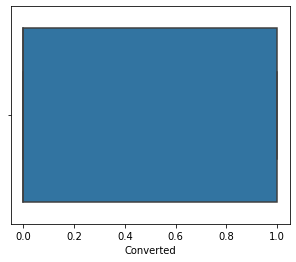

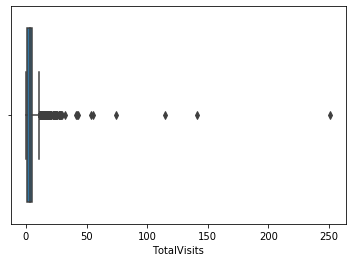

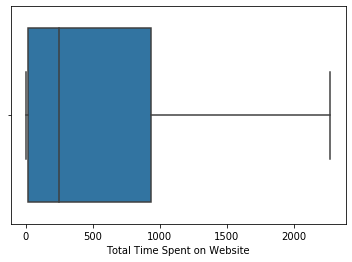

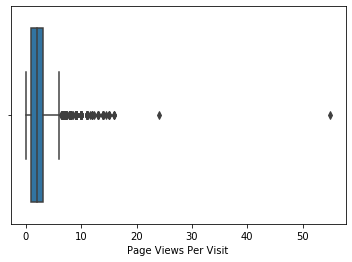

In [37]:
# Finding the presence of outliers in numeric column

plt.figure(figsize=[5,4])
for i in num_cols:
    sns.boxplot(lead_df[i])
    plt.show()

Outliers are found in TotalVisits and Page Views Per Visit, as these two are important features which could help us in deciding the lead score, we should not remove these outliers. Higher these values more are the chances of any lead to get converted. We could cap these higher valuesTotalVisits and Page Views Per Visit

In [38]:
TotalVisits_q4 = lead_df['TotalVisits'].quantile(0.99)
lead_df['TotalVisits'][lead_df['TotalVisits']> TotalVisits_q4] = TotalVisits_q4


PageViewsPerVisits_q4 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']> PageViewsPerVisits_q4] = PageViewsPerVisits_q4

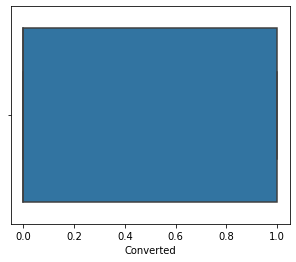

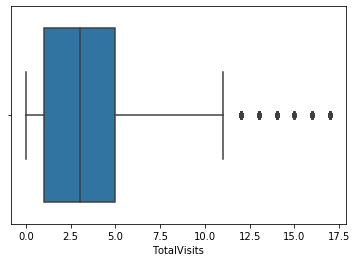

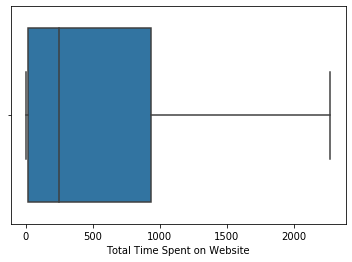

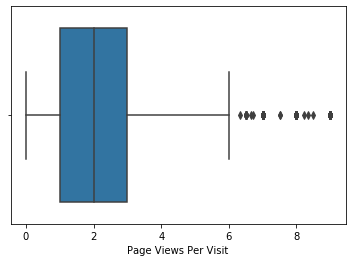

In [39]:
# Checking the presence of outliers in numeric column after capping

plt.figure(figsize=[5,4])
for i in num_cols:
    sns.boxplot(lead_df[i])
    plt.show()

From the above plot, we could observe that TotalVisits and Page Views Per Visit features have outliers at the higher end

As TotalVisits and Page Views Per Visit features have outliers, we can impute median to the null values.  

In [40]:
col1 = ['TotalVisits','Page Views Per Visit']
lead_df[col1] = lead_df[col1].fillna(lead_df.median().iloc[0])

In [41]:
# Finally checking the if any nan values are present
lead_df.isnull().sum() * 100 / len(lead_df)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [42]:
# Final number of rows and columns retained
lead_df.shape

(9240, 28)

### EDA

<Figure size 1440x720 with 0 Axes>

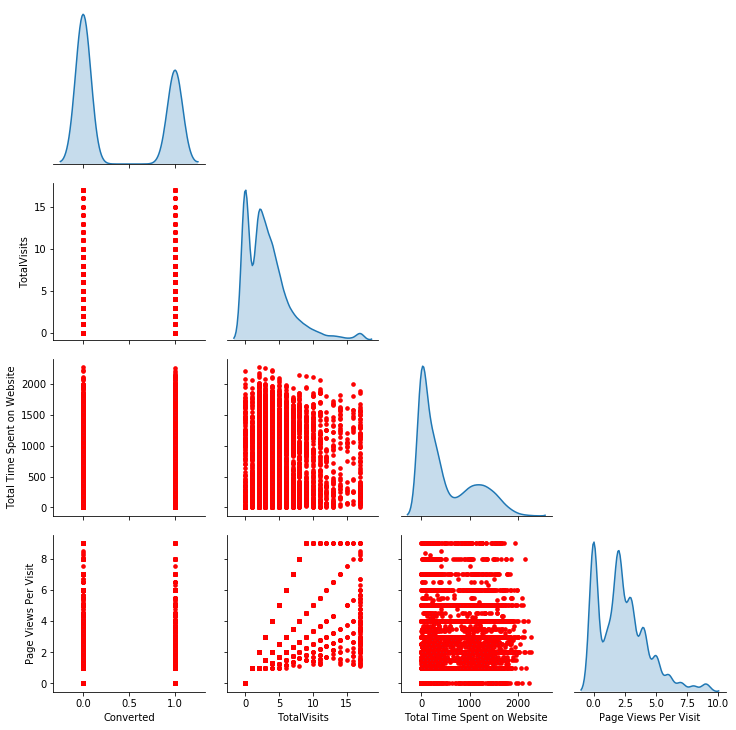

In [43]:
#pairplot of numerical variables

plt.figure(figsize = (20,10))
sns.pairplot(lead_df,diag_kind='kde',corner=True,plot_kws=dict(s=7, edgecolor="r", linewidth=2))
plt.show()


There is a somewhat positive correlation between TotalVisits and Page Views Per Visit.

### Univariate Analysis

In [44]:
# Finding all the categorical columns in the dataframe
cat_col = [key for key in dict(lead_df.dtypes)
             if dict(lead_df.dtypes)[key] in ['object'] ] # Categorical Varible
print(cat_col)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


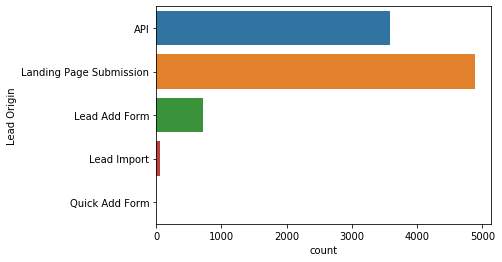

In [45]:
# Plotting the count of Lead Origin against the various values present. 

sns.countplot(y = lead_df['Lead Origin'], data = lead_df)
plt.show()

In the categorical Lead Origin feature, we could see that  the origin identifier is maximum for Landing Page Submission and least fro Quick Add Form

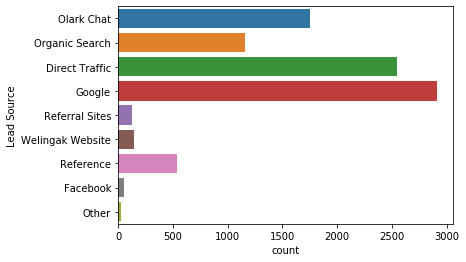

In [46]:
# Plotting the count of Lead Source against the various values present. 

sns.countplot(y = lead_df['Lead Source'], data = lead_df)
plt.show()

In the categorical Lead Source feature, we could see that the source of the lead is maximum for Google followed by Direct Trafiic and the least is for other values like Click2call,Social Media, Press_Release,Live Chat,welearnblog_Home etc

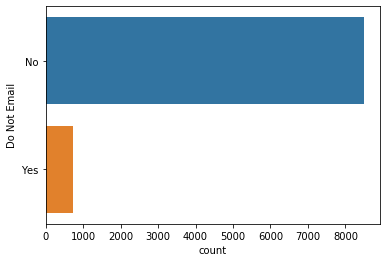

In [47]:
# Plotting the count of Do Not Email against the various values present. 

sns.countplot(y = lead_df['Do Not Email'], data = lead_df)
plt.show()

From the above count plot we could conclude that majority of people has opted for "No" in Do Not Email feature

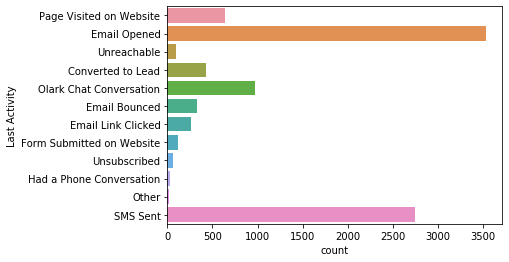

In [48]:
# Plotting the count of Last Activity against the various values present. 

sns.countplot(y = lead_df['Last Activity'], data = lead_df)
plt.show()

Email opened was the Last Activity for most of the users followed by SMS Sent category

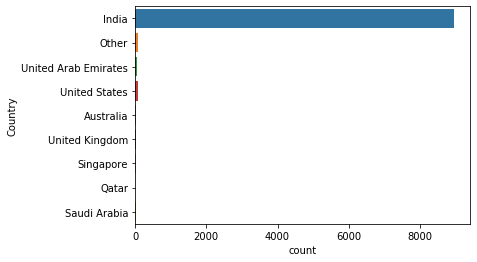

In [49]:
# Plotting the count of Country against the various values present. 

sns.countplot(y = lead_df['Country'], data = lead_df)
plt.show()

We could see that maximum leads are from India.

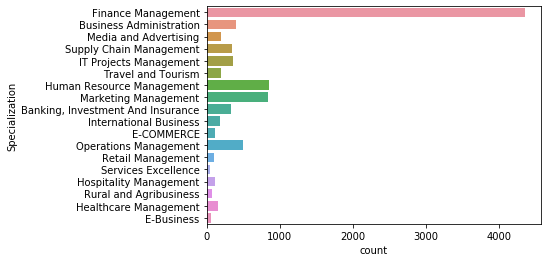

In [50]:
# Plotting the count of Specialization against the various values present. 

sns.countplot(y = lead_df['Specialization'], data = lead_df)
plt.show()

Finance Management is the most commom Specialization followed by Human Resource Management and Marketing Management

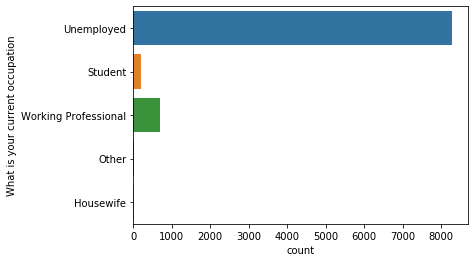

In [51]:
# Plotting the count of What is your current occupation against the various values present. 

sns.countplot(y = lead_df['What is your current occupation'], data = lead_df)
plt.show()

From the above plot we could observe that Unemployed is the highest occupation type and then comes the Working professional 

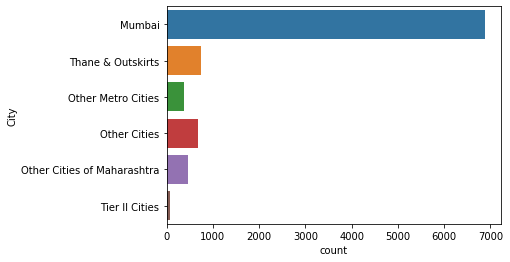

In [52]:
# Plotting the count of City against the various values present. 

sns.countplot(y = lead_df['City'], data = lead_df)
plt.show()

Mumbai city is having the highest count while tier II cities is having the least count.

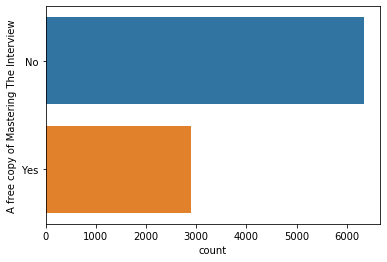

In [53]:
# Plotting the count of A free copy of Mastering The Interview against the various values present. 

sns.countplot(y = lead_df['A free copy of Mastering The Interview'], data = lead_df)
plt.show()

For 'A free copy of Mastering The Interview' feature more number of industry professionals opted for "No"

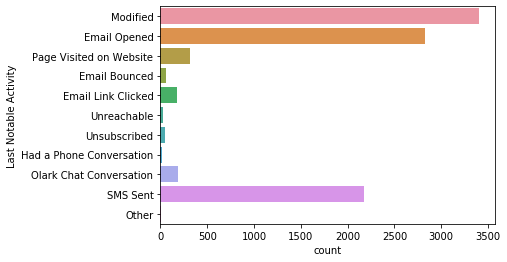

In [54]:
#Last Notable Activity
# Plotting the count of Prospect ID against the various values present. 

sns.countplot(y = lead_df['Last Notable Activity'], data = lead_df)
plt.show()

Last Notable Activity performed by student is maximum for "Modified" followed by "Email Opened" and least for "Unreachable"

### Analyzing the TARGET Column: Converted

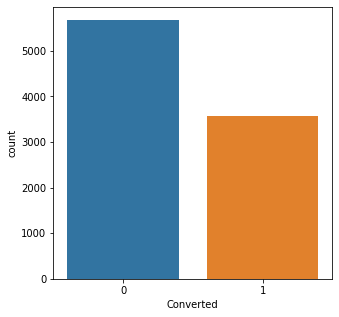

In [55]:
plt.figure(figsize=[5,5])
sns.countplot(x='Converted', data=lead_df)

plt.show()

The Target variable 'Converted' has more values which were not converted (approaximately 62%).

In [56]:
# Percentage values
lead_df.Converted.value_counts(normalize=True) * 100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

The percentage of lead conversion is approximately 38.53%.

### Splitting data and plotting graphs parallelly

In [57]:
lead_df1 = lead_df[lead_df.Converted == 1]
lead_df1.head()

Prospect ID              Lead Origin  \
2   8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
4   3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
6   9fae7df4-169d-489b-afe4-0f3d752542ed  Landing Page Submission   
10  2a369e35-ca95-4ca9-9e4f-9d27175aa320  Landing Page Submission   
11  9bc8ce93-6144-49e0-9f9d-080fc980f83c  Landing Page Submission   

       Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
2   Direct Traffic           No          No          1          2.0   
4           Google           No          No          1          2.0   
6           Google           No          No          1          2.0   
10  Organic Search           No          No          1          8.0   
11  Direct Traffic           No          No          1          8.0   

    Total Time Spent on Website  Page Views Per Visit  \
2                          1532                  2.00   
4                          1428                  1.00   
6                          1640                  2.00   
10                         1351                  8.00   
11                         1343                  2.67   

              Last Activity  ... Newspaper Digital Advertisement  \
2              Email Opened  ...        No                    No   
4         Converted to Lead  ...        No                    No   
6              Email Opened  ...        No                    No   
10             Email Opened  ...        No                    No   
11  Page Visited on Website  ...        No                    No   

   Through Recommendations Receive More Updates About Our Courses  \
2                       No                                     No   
4                       No                                     No   
6                       No                                     No   
10                      No                                     No   
11                      No                                     No   

   Update me on Supply Chain Content Get updates on DM Content  \
2                                 No                        No   
4                                 No                        No   
6                                 No                        No   
10                                No                        No   
11                                No                        No   

                  City I agree to pay the amount through cheque  \
2               Mumbai                                       No   
4               Mumbai                                       No   
6               Mumbai                                       No   
10  Other Metro Cities                                       No   
11   Thane & Outskirts                                       No   

   A free copy of Mastering The Interview    Last Notable Activity  
2                                     Yes             Email Opened  
4                                      No                 Modified  
6                                      No                 Modified  
10                                    Yes             Email Opened  
11                                    Yes  Page Visited on Website  

[5 rows x 28 columns]

In [58]:
lead_df0 = lead_df[lead_df.Converted == 0]
lead_df0.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce                      API   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
3  Direct Traffic           No          No          0          1.0   
5      Olark Chat           No          No          0          0.0   
7      Olark Chat           No          No          0          0.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
3                          305                   1.0              Unreachable   
5                            0                   0.0  Olark Chat Conversation   
7                            0                   0.0  Olark Chat Conversation   

   ... Newspaper Digital Advertisement Through Recommendations  \
0  ...        No                    No                      No   
1  ...        No                    No                      No   
3  ...        No                    No                      No   
5  ...        No                    No                      No   
7  ...        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
3                                     No                                No   
5                                     No                                No   
7                                     No                                No   

  Get updates on DM Content    City I agree to pay the amount through cheque  \
0                        No  Mumbai                                       No   
1                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
5                        No  Mumbai                                       No   
7                        No  Mumbai                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
3                                     No              Modified  
5                                     No              Modified  
7                                     No              Modified  

[5 rows x 28 columns]

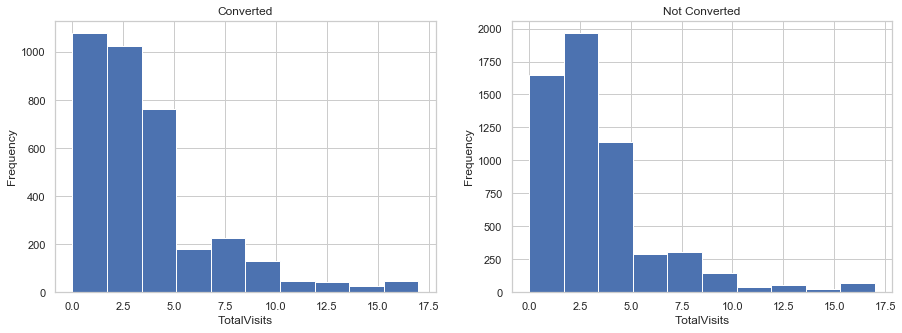

In [59]:
# Plotting TotalVisits amount for the TARGET variable.
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.ylabel("Frequency")
plt.xlabel("TotalVisits")
plt.hist(lead_df1.TotalVisits,bins =10)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.hist(lead_df0.TotalVisits,bins =10)
plt.xlabel("TotalVisits")
plt.ylabel("Frequency")
plt.gcf().axes[1].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.show()

For the industry professional who got converted has lesser total visits on the website while industry professional who did not get converted has higher number of total visits. This could imply that these users are still confused about the course and keep on visiting the website.

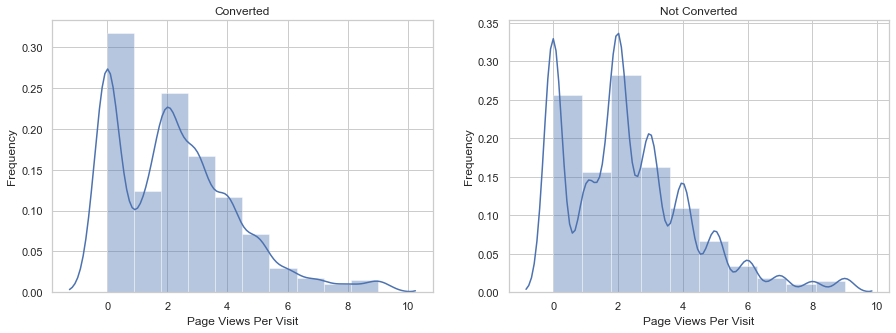

In [60]:
# Plotting Page Views Per Visit for the TARGET variable.
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.ylabel("Frequency")
plt.xlabel("Page Views Per Visit")
sns.distplot(lead_df1['Page Views Per Visit'],bins =10)
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

plt.subplot(1,2,2)
plt.title("Not Converted")
sns.distplot(lead_df0['Page Views Per Visit'],bins =10)
plt.xlabel("Page Views Per Visit")
plt.ylabel("Frequency")
plt.gcf().axes[1].xaxis.get_major_formatter().set_scientific(False)
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.show()

For the industry professional who got converted has higher Page Views Per Visit on the website while industry professional who did not get converted has lesser number of total visits. This could imply that the users which are converted researched more on the website and has high page views per visit.

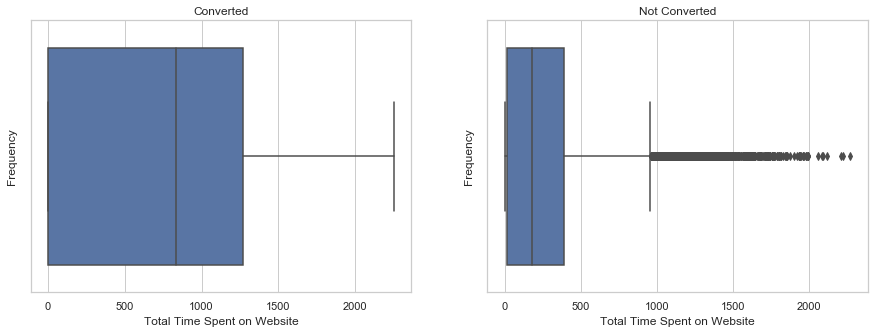

In [61]:
# Plotting Total Time Spent on Website amount for the TARGET variable.
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.ylabel("Frequency")
plt.xlabel("Total Time Spent on Website")
sns.boxplot(x = lead_df1['Total Time Spent on Website'])

plt.subplot(1,2,2)
plt.title("Not Converted")
sns.boxplot(x = lead_df0['Total Time Spent on Website'])
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Frequency")
plt.show()

For the industry professional who got converted has higher values and no outliers when total time spent on website is considered while industry professional who did not get converted has lot of outliers and has comparatively lesser value.
This could imply that the users which are converted researched more on the website and has high page views per visit.

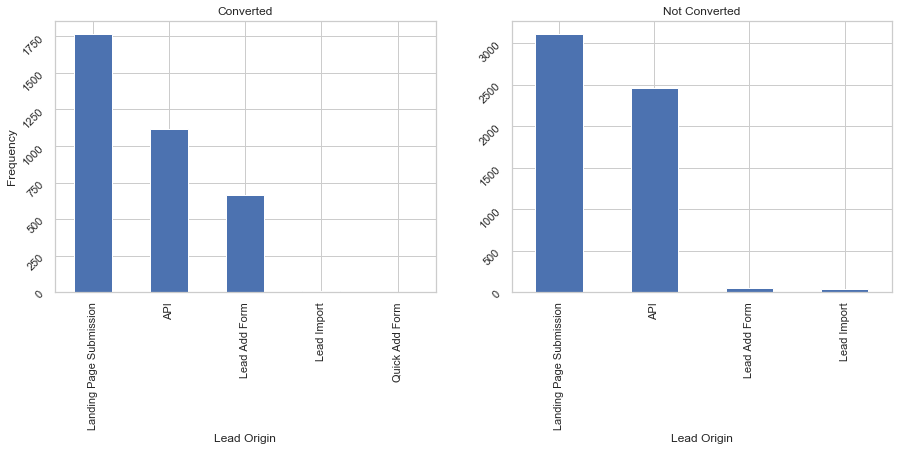

In [62]:
# Plotting Lead Origin for TARGET variable
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.xlabel("Lead Origin")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
chart = lead_df1['Lead Origin'].value_counts().plot.bar()

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.xlabel("Lead Origin")
lead_df0['Lead Origin'].value_counts().plot.bar()
plt.show()

Not Converted industry proffessionals has higher count in "Landing Page Submission" and "API". But for "Lead Add Form" we see that the count is more for Converted industry professional.

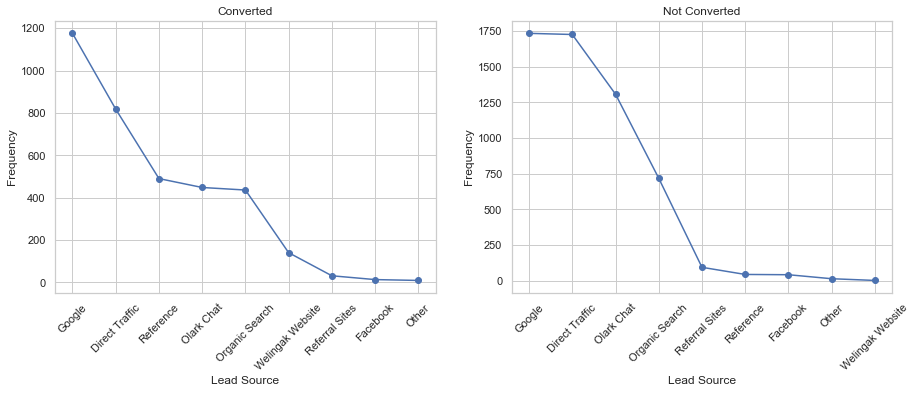

In [63]:
# Plotting Lead Source for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.xlabel("Lead Source")
plt.ylabel("Frequency") 
chart = lead_df1['Lead Source'].value_counts().plot.line(marker='o')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.xlabel("Lead Source")
plt.ylabel("Frequency")
chart2 = lead_df0['Lead Source'].value_counts().plot.line(marker='o')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.show()

Most of the leads that are converted and unconverted are obtained through Google Search Engine.

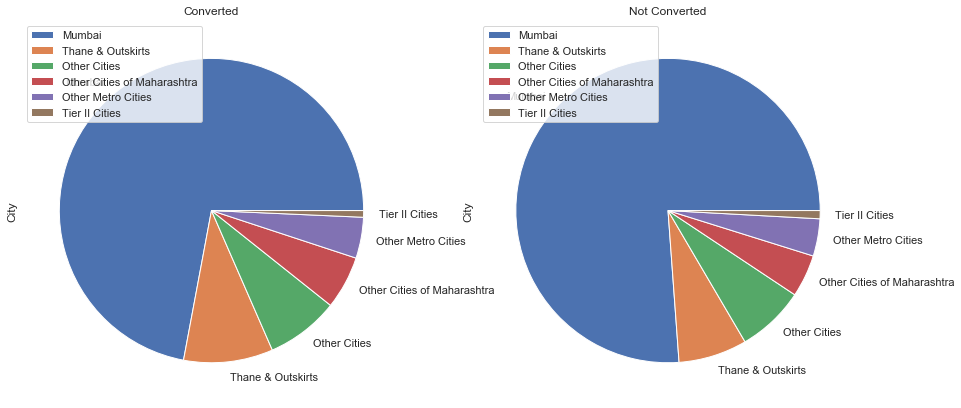

In [64]:
# Plotting City for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
labels =list(lead_df.City.value_counts().index)
plt.title("Converted")

lead_df1.City.value_counts().plot.pie()
plt.legend(labels,loc=2)

plt.subplot(1,2,2)
plt.title("Not Converted")
lead_df0.City.value_counts().plot.pie()
plt.legend(labels,loc=2)
plt.show()

Among all the cities Mumbai City has the highest count for both the converted and not converted industry professional followed by Thane & Outskirts.

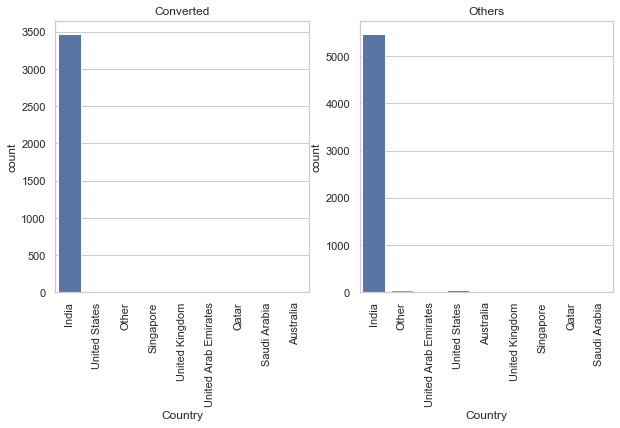

In [65]:
# Plotting Country for TARGET variable

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart2 = sns.countplot(x= lead_df1.Country, data=lead_df1)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title("Others")
chart1 = sns.countplot(x= lead_df0.Country, data=lead_df0)
plt.xticks(rotation=90)
plt.show()

Among all the countries India has the highest count for both the converted and not converted industry professional.

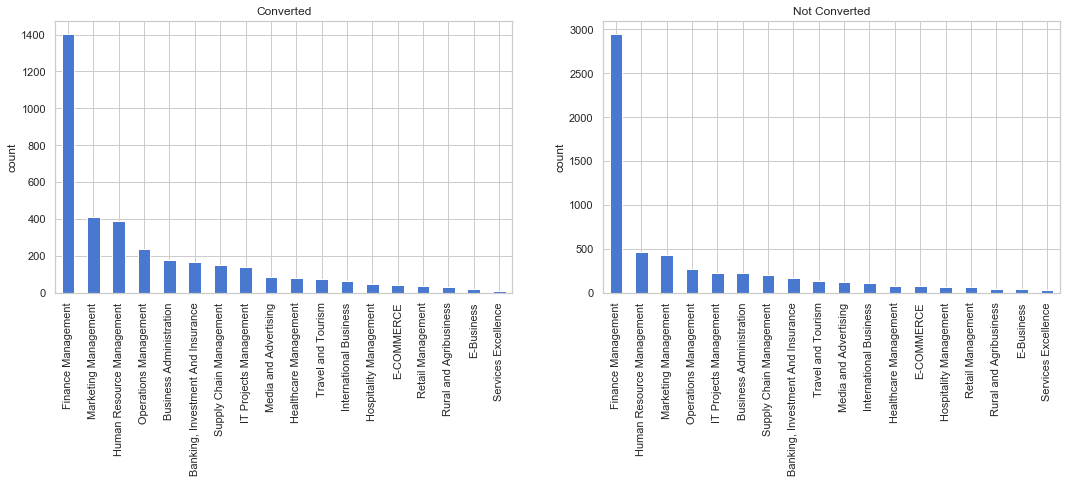

In [66]:
# Plotting Specialization for TARGET variable

plt.style.use("seaborn-muted")
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.ylabel("count")
lead_df1.Specialization.value_counts().plot.bar()

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.ylabel("count")
lead_df0.Specialization.value_counts().plot.bar()
plt.show()

Finance Management is the most commom Specialization followed by Human Resource Management and Marketing Management

### Correlation 

In [67]:
#Top correlated values 

corr = lead_df.corr()
corr

Converted  TotalVisits  \
Converted                     1.000000     0.033704   
TotalVisits                   0.033704     1.000000   
Total Time Spent on Website   0.362483     0.311558   
Page Views Per Visit         -0.015102     0.711191   

                             Total Time Spent on Website  Page Views Per Visit  
Converted                                       0.362483             -0.015102  
TotalVisits                                     0.311558              0.711191  
Total Time Spent on Website                     1.000000              0.321924  
Page Views Per Visit                            0.321924              1.000000

In [68]:
# The top 10 highly correlated variables
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df = corr_df.unstack().reset_index().dropna(subset =[0]).sort_values(by = 0,ascending = False).head(10)
corr_df.columns = ["Variable 1", "Variable 2","Correlation Value"]
corr_df

Variable 1                   Variable 2  \
13         Page Views Per Visit                  TotalVisits   
8   Total Time Spent on Website                    Converted   
14         Page Views Per Visit  Total Time Spent on Website   
9   Total Time Spent on Website                  TotalVisits   
4                   TotalVisits                    Converted   
12         Page Views Per Visit                    Converted   

    Correlation Value  
13           0.711191  
8            0.362483  
14           0.321924  
9            0.311558  
4            0.033704  
12          -0.015102

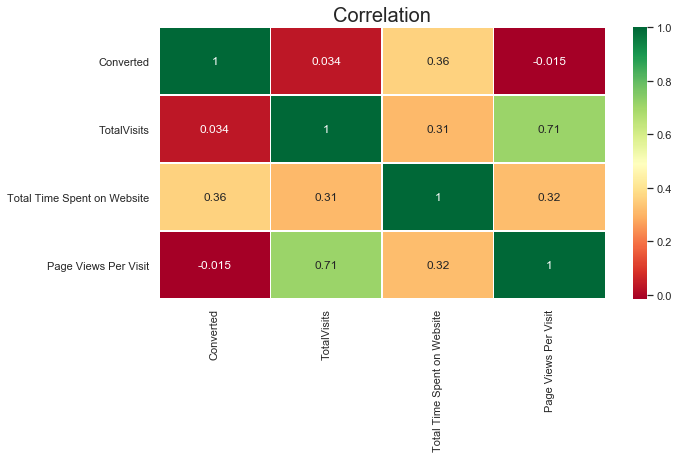

In [69]:
# Correlation Heatmap
plt.figure(figsize = (10,5))

ax = plt.axes()
sns.heatmap(lead_df.corr(),annot = True, linewidth = 0.5,cmap = "RdYlGn")
ax.set_title("Correlation", fontsize =20)
plt.show()

Page Views Per Visit and TotalVisits has the highest correlation of 0.711191 suggesting that as the total number of visits increases the page views per visits also increases.

### Bivariate Analysis for Categorical~Categorical columns

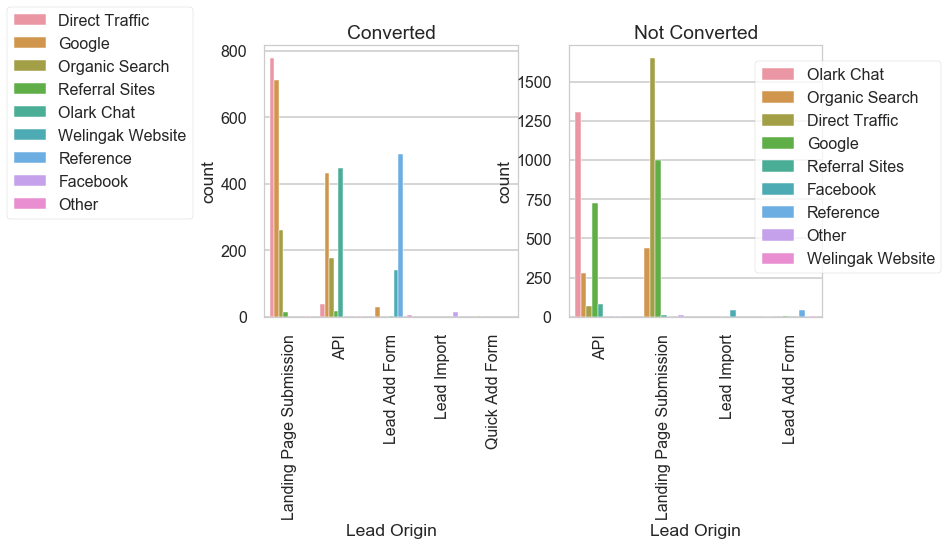

In [70]:
# Plotting Lead Origin against Lead Source

plt.style.use("seaborn-poster")
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart1 = sns.countplot(x = lead_df1['Lead Origin'] ,hue = lead_df1['Lead Source'], data= lead_df1)
chart1.legend(loc='right', bbox_to_anchor=(-0.25, 0.75), ncol=1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)


plt.subplot(1,2,2)
plt.title("Not Converted")
chart2 = sns.countplot(x = lead_df0['Lead Origin'] ,hue = lead_df0['Lead Source'], data= lead_df0)
chart2.legend(loc='right', bbox_to_anchor=(1.5, 0.55), ncol=1)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

Inferences:
For the converted leads, most of the leads are from direct traffic and Google through Landing Page Submission
For the non converted leads, most of them are through direct tarffic and Organic Search through Landing Page Submission.

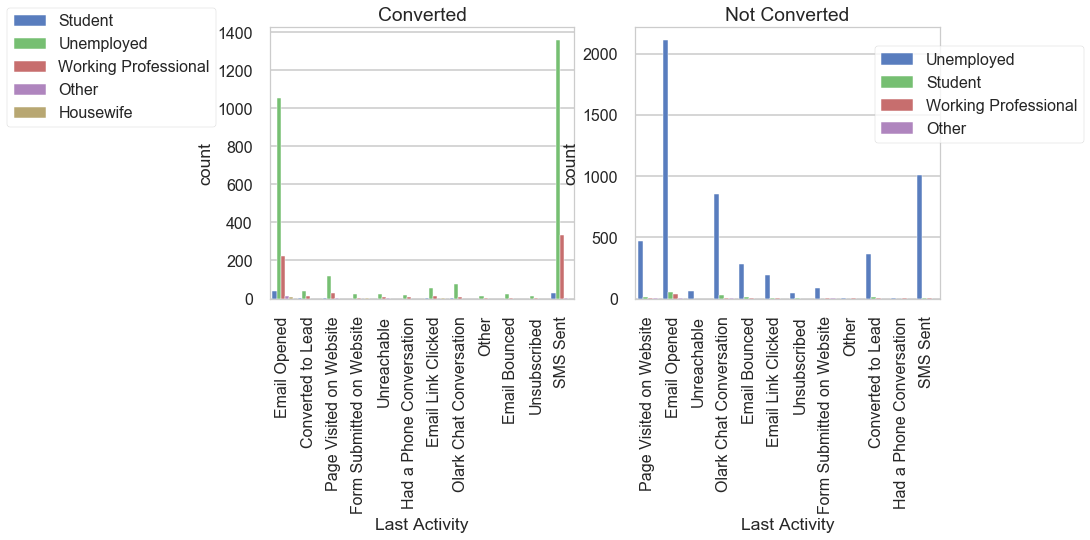

In [71]:
# Plotting Last Activity against What is your current occupation

plt.style.use("seaborn-poster")
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart1 = sns.countplot(x = lead_df1['Last Activity'] ,hue = lead_df1['What is your current occupation'], data=lead_df1)
chart1.legend(loc='right', bbox_to_anchor=(-0.15, 0.85), ncol=1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
plt.title("Not Converted")
chart2 = sns.countplot(x = lead_df0['Last Activity'] ,hue = lead_df0['What is your current occupation'], data=lead_df0)
chart2.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

For the converted Leads:
- SMS was sent and Email was Opened by the most number of Unemployed Leads. This was then followed by the Working Professionals.
For the non converted Leads:
- Most number of unemployed leads opened Emails, had an Olark Chat Conversation and SMS was sent by the sales teams. They also Visited the Page on the Website and Cliked on Email Links.

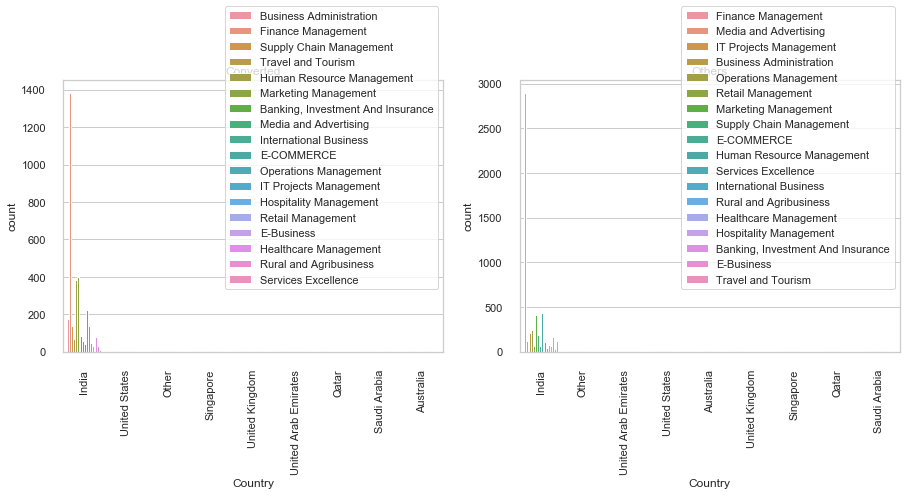

In [72]:
# Plotting Country against Specialization

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart1 = sns.countplot(x = lead_df1.Country ,hue = lead_df1.Specialization, data= lead_df1)
chart1.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = lead_df0.Country ,hue = lead_df0.Specialization, data= lead_df0)
chart2.legend(loc='right', bbox_to_anchor=(1.0, 0.75), ncol=1)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

The converted leads from the Country of India are mostly specialized in Finance Management and Marketing Management.
The non converted leads from India are mostly specialized in Tarvel and Tourism, Rural and Agribusiness and some in Marketing Management.

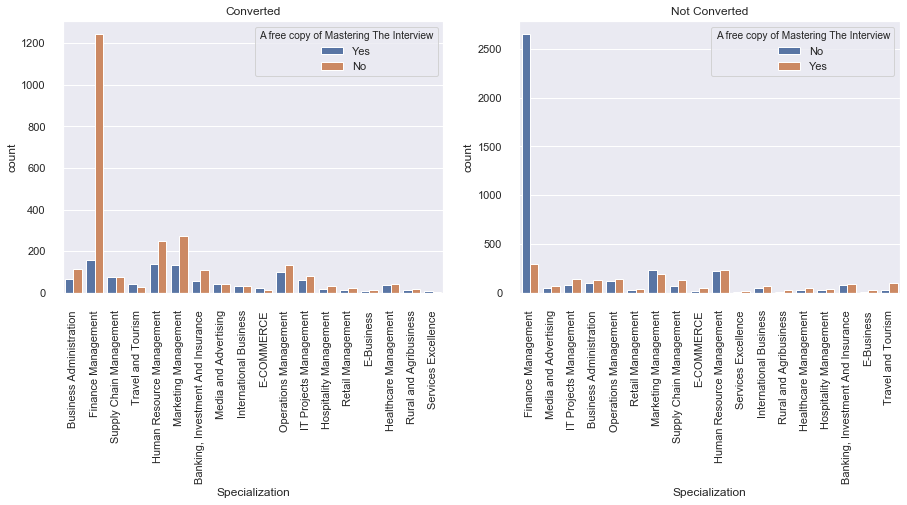

In [73]:
# Plotting Specialization against A free copy of Mastering The Interview

sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart1 = sns.countplot(x = lead_df1.Specialization ,hue = lead_df1['A free copy of Mastering The Interview'], data= lead_df1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
plt.title("Not Converted")
chart1 = sns.countplot(x = lead_df0.Specialization ,hue = lead_df0['A free copy of Mastering The Interview'], data= lead_df0)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)
plt.show()

Most number of leads from Finance Management did not want a copy of Mastering the Interview.

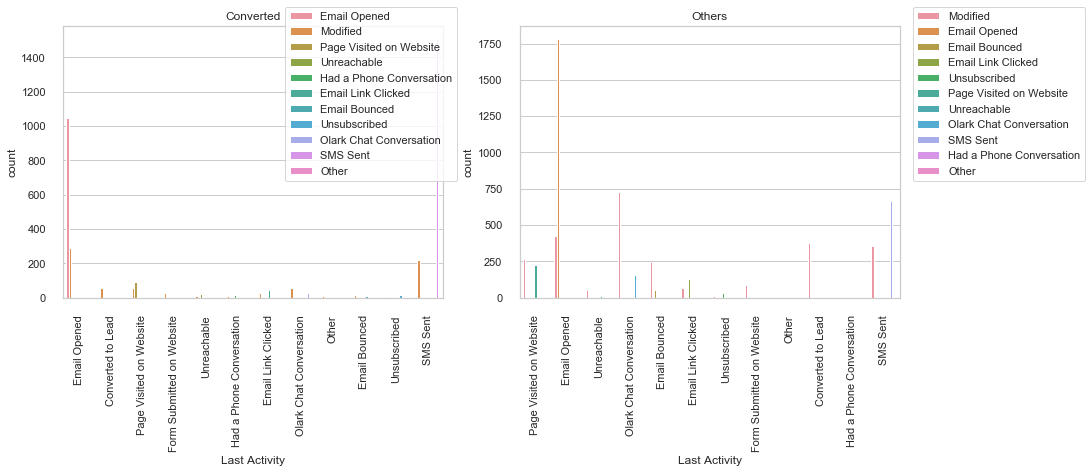

In [74]:
# Plotting Last Activity against Last Notable Activity

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
chart1 = sns.countplot(x = lead_df1['Last Activity'] ,hue = lead_df1['Last Notable Activity'], data= lead_df1)
chart1.legend(loc='right', bbox_to_anchor=(1.05, 0.75), ncol=1)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

plt.subplot(1,2,2)
plt.title("Others")
chart2 = sns.countplot(x = lead_df0['Last Activity'] ,hue = lead_df0['Last Notable Activity'], data= lead_df0)
chart2.legend(loc='right', bbox_to_anchor=(1.5, 0.75), ncol=1)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
plt.show()

Email was opened by most of the leads in general. For some of the leads, the last Activity was SMS Sent.

### Bivariate Analysis for Continuous~Continuous columns

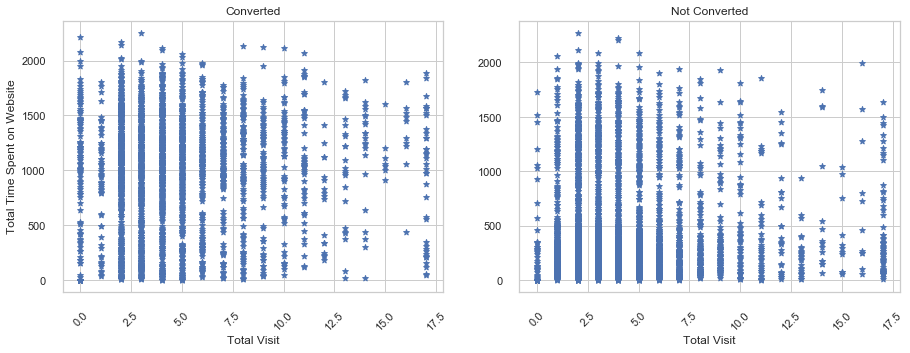

In [75]:
# Plotting TotalVisits against Total Time Spent on Website

sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.scatter(lead_df1.TotalVisits ,lead_df1['Total Time Spent on Website'],marker = '*')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.xlabel("Total Visit")
plt.ylabel("Total Time Spent on Website")

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.scatter(lead_df0.TotalVisits ,lead_df0['Total Time Spent on Website'],marker = '*')
plt.gcf().axes[1].xaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=45)
plt.xlabel("Total Visit")
plt.show()

The leads spent a considerable amount of time on the website and also made a considerable number of visits.

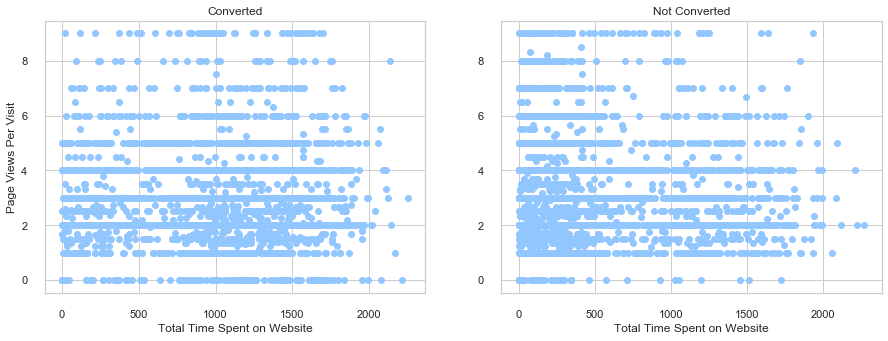

In [76]:
# Plotting Total Time Spent on Website against Page Views Per Visit

plt.style.use("seaborn-pastel")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.scatter(lead_df1['Total Time Spent on Website'] ,lead_df1['Page Views Per Visit'])
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Page Views Per Visit")

plt.subplot(1,2,2)
plt.title("Not Converted")
plt.scatter(lead_df0['Total Time Spent on Website'] ,lead_df0['Page Views Per Visit'])
plt.gcf().axes[1].yaxis.get_major_formatter().set_scientific(False)
plt.xlabel("Total Time Spent on Website")
plt.show()

The converted and non converted leads spent a considerable amount of time on the Webiste, but not all leads yielded many page views per visit.

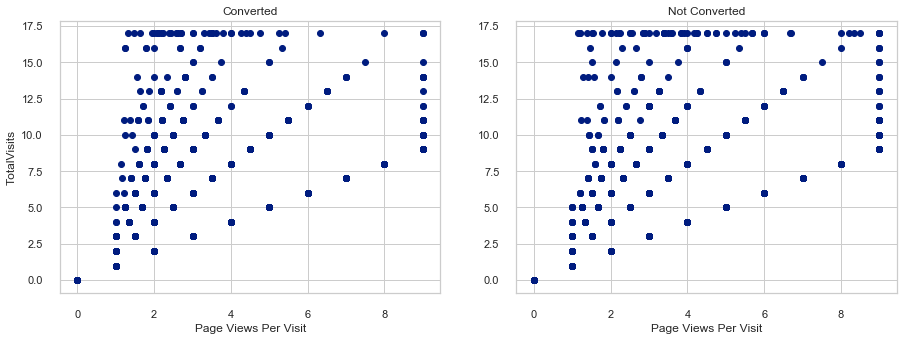

In [77]:
# Plotting Page Views Per Visit against TotalVisits


plt.style.use("seaborn-dark-palette")
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Converted")
plt.scatter(lead_df1['Page Views Per Visit'] ,lead_df1.TotalVisits)
plt.xlabel("Page Views Per Visit")
plt.ylabel("TotalVisits")


plt.subplot(1,2,2)
plt.title("Not Converted")
plt.scatter(lead_df0['Page Views Per Visit'] ,lead_df0.TotalVisits)
plt.xlabel("Page Views Per Visit")
plt.show()

We could observe from the above plot that as the total visits increases Page views per visit also increases, showing that these two variables are positively correlated

### Bivariate Analysis for Continuous~Category columns

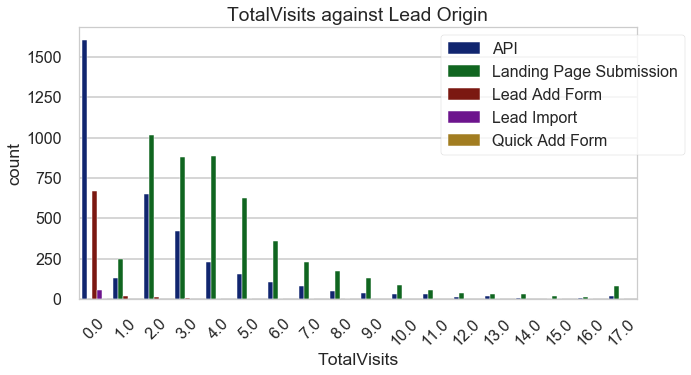

In [78]:
# Plotting TotalVisits against Lead Origin

plt.style.use("seaborn-poster")
plt.figure(figsize=(10,5))
plt.title("TotalVisits against Lead Origin")
chart1 = sns.countplot(x = lead_df['TotalVisits'] ,hue = lead_df['Lead Origin'], data=lead_df)
chart1.legend(loc='right', bbox_to_anchor=(1.10, 0.75), ncol=1)
plt.xticks(rotation=45)
plt.show()

Most of the Visits are from the API and Landing Page Submission for the leads.

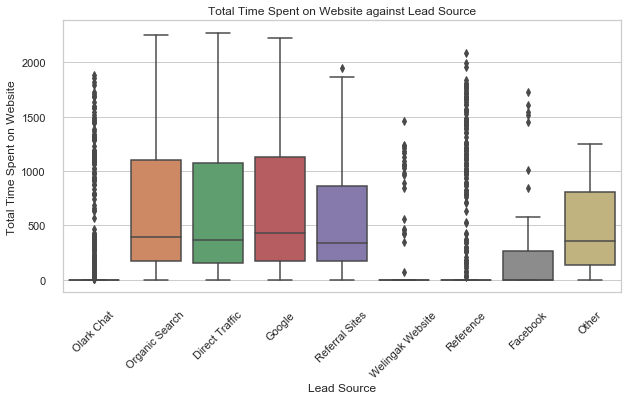

In [79]:
# Plotting Total Time Spent on Website against Lead Source

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

plt.title("Total Time Spent on Website against Lead Source")
sns.boxplot(x = lead_df['Lead Source'] ,y = lead_df['Total Time Spent on Website'], data=lead_df)
plt.xticks(rotation=45)


plt.show()

Industry Professionals with Lead source type as "Direct Traffic" has the maximum Total Time Spent on Website among all the industry professionals. Also, almost all of the categories has a lot of outliers present except Organic Search, Direct Traffic, Google and others category.

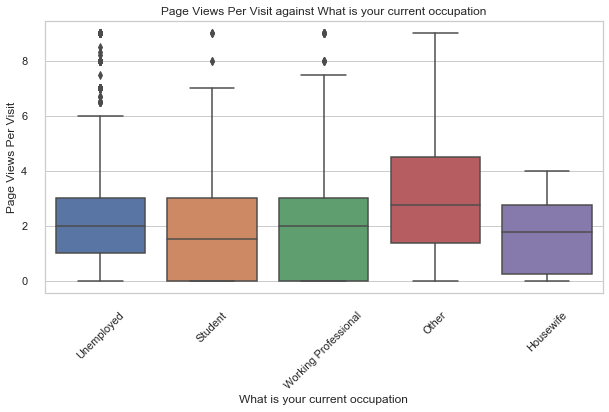

In [80]:
# Plotting Page Views Per Visit against What is your current occupation

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

plt.title("Page Views Per Visit against What is your current occupation")
sns.boxplot(x = lead_df['What is your current occupation'] ,y = lead_df['Page Views Per Visit'], data=lead_df)
plt.xticks(rotation=45)


plt.show()

Industry Professionals with Current occupation type as "Housewife" has the minium Page Views per visit among all the industry professionals. Also, almost all of the categories has a lot of outliers present except Housewife and others category.

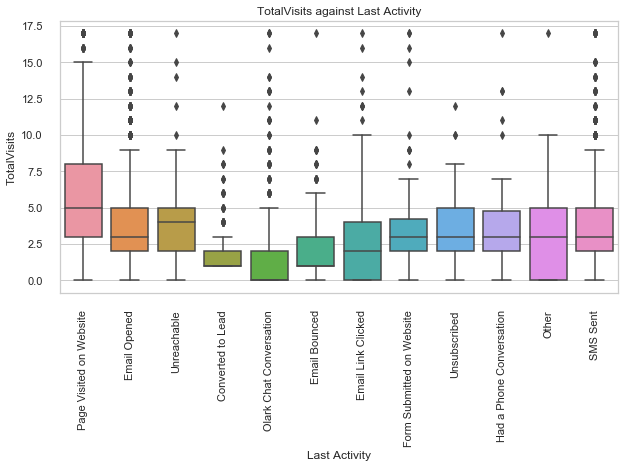

In [81]:
# Plotting TotalVisits against Last Activity

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

plt.title("TotalVisits against Last Activity")
sns.boxplot(y = lead_df['TotalVisits'] ,x = lead_df['Last Activity'], data=lead_df)
plt.xticks(rotation=90)


plt.show()

Industry Professionals with Last activity type as "Page Visited on website" has the maximum total visits among all the industry professionals an "Converted to Lead" has the lowest total visits. Also, almost all of the categories has a lot of outliers present inferring that some industry professionals has much higher total visits.

## 2. Preparing Data for Modelling
- Creating dummies for categorical columns
- Performing Test Train Split
- Performing Scaling

#### Converting some binary variables (Yes/No) to 0/1

In [82]:
# List of variables to map

varlist =  ['Do Not Email',
 'Do Not Call',               
 'Search',
 'Newspaper Article',                        
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',                  
 'A free copy of Mastering The Interview',
'Magazine',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content',
'Get updates on DM Content',
'I agree to pay the amount through cheque']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [83]:
lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   ... Newspaper Digital Advertisement Through Recommendations  \
0  ...         0                     0                       0   
1  ...         0                     0                       0   
2  ...         0                     0                       0   
3  ...         0                     0                       0   
4  ...         0                     0                       0   

  Receive More Updates About Our Courses  Update me on Supply Chain Content  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   

   Get updates on DM Content    City  \
0                          0  Mumbai   
1                          0  Mumbai   
2                          0  Mumbai   
3                          0  Mumbai   
4                          0  Mumbai   

   I agree to pay the amount through cheque  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 28 columns]

#### Dummifying the nominal categorical columns which are not binary and dropping the first column of the dummy variable to avoid the dummy variable trap (one-hot) encoding

The non- binary features that need to be one hot encoded are:
- 'Lead Origin',
- 'Lead Source',
- 'City',
- 'Last Activity',
- 'Country',
- 'Specialization',
- 'What is your current occupation',
- 'What matters most to you in choosing a course',
- 'Last Notable Activity'

In [84]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
leaddata = pd.get_dummies( data = lead_df, columns = ['Lead Origin',
'Lead Source',
'Last Activity',
'City',
'Country',
'Specialization',
'What is your current occupation',
'What matters most to you in choosing a course',
'Last Notable Activity'], drop_first=True)


leaddata.head()


Prospect ID  Do Not Email  Do Not Call  Converted  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
4  3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  Search  \
0          0.0                            0                   0.0       0   
1          5.0                          674                   2.5       0   
2          2.0                         1532                   2.0       0   
3          1.0                          305                   1.0       0   
4          2.0                         1428                   1.0       0   

   Magazine  Newspaper Article  ...  Last Notable Activity_Email Link Clicked  \
0         0                  0  ...                                         0   
1         0                  0  ...                                         0   
2         0                  0  ...                                         0   
3         0                  0  ...                                         0   
4         0                  0  ...                                         0   

   Last Notable Activity_Email Opened  \
0                                   0   
1                                   1   
2                                   1   
3                                   0   
4                                   0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  Last Notable Activity_Other  \
0                                              0                            0   
1                                              0                            0   
2                                              0                            0   
3                                              0                            0   
4                                              0                            0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  
0                                   0  
1                                   0  
2                                   0  
3                                   0  
4                                   0  

[5 rows x 87 columns]

In [85]:
leaddata.columns

Index(['Prospect ID', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'La

In [86]:
leaddata.shape

(9240, 87)

In [87]:
leaddata = leaddata.set_index('Prospect ID')

In [88]:
leaddata.head()

Do Not Email  Do Not Call  Converted  \
Prospect ID                                                                  
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          1   

                                      TotalVisits  \
Prospect ID                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0.0   
2a272436-5132-4136-86fa-dcc88c88f482          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          1.0   
3256f628-e534-4826-9d63-4a8b88782852          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  Search  Magazine  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0       0         0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5       0         0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0       0         0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0       0         0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0       0         0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                                      ...  \
Prospect ID                           ...   
7927b2df-8bba-4d29-b9a2-b6e0beafe620  ...   
2a272436-5132-4136-86fa-dcc88c88f482  ...   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a  ...   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc  ...   
3256f628-e534-4826-9d63-4a8b88782852  ...   

                                      Last Notable Activity_Email Link Clicked  \
Prospect ID                                                                      
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                         0   
2a272436-5132-4136-86fa-dcc88c88f482                                         0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                         0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                         0   
3256f628-e534-4826-9d63-4a8b88782852                                         0   

                                      Last Notable Activity_Email Opened  \
Prospect ID                                                                
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                   0   
2a272436-5132-4136-86fa-dcc88c88f482                                   1   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                   1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                   0   
3256f628-e534-4826-9d63-4a8b88782852                                   0   

                                      Last Notable Activity_Had a Phone Conversation  \
Prospect

In [89]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 7927b2df-8bba-4d29-b9a2-b6e0beafe620 to 571b5c8e-a5b2-4d57-8574-f2ffb06fdeff
Data columns (total 86 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9240 non-null   int64  
 1   Do Not Call                                           9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   Search                                                9240 non-null   int64  
 7   Magazine                                              9240 non-null   int64  
 

We can see that all columns are numeric.

### Performing Test Train Split

In [90]:
# Putting feature variable to X
X = leaddata.drop(['Converted'], axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620             0            0          0.0   
2a272436-5132-4136-86fa-dcc88c88f482             0            0          5.0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0            0          2.0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0            0          1.0   
3256f628-e534-4826-9d63-4a8b88782852             0            0          2.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
7927b2df-8bba-4d29-b9a2-b6e0beafe620                            0   
2a272436-5132-4136-86fa-dcc88c88f482                          674   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         1532   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                          305   
3256f628-e534-4826-9d63-4a8b88782852                         1428   

                                      Page Views Per Visit  Search  Magazine  \
Prospect ID                                                                    
7927b2df-8bba-4d29-b9a2-b6e0beafe620                   0.0       0         0   
2a272436-5132-4136-86fa-dcc88c88f482                   2.5       0         0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                   2.0       0         0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                   1.0       0         0   
3256f628-e534-4826-9d63-4a8b88782852                   1.0       0         0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
7927b2df-8bba-4d29-b9a2-b6e0beafe620                  0                   0   
2a272436-5132-4136-86fa-dcc88c88f482                  0                   0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                  0                   0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                  0                   0   
3256f628-e534-4826-9d63-4a8b88782852                  0                   0   

                                      Newspaper  ...  \
Prospect ID                                      ...   
7927b2df-8bba-4d29-b9a2-b6e0beafe620          0  ...   
2a272436-5132-4136-86fa-dcc88c88f482          0  ...   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a          0  ...   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc          0  ...   
3256f628-e534-4826-9d63-4a8b88782852          0  ...   

                                      Last Notable Activity_Email Link Clicked  \
Prospect ID                                                                      
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                         0   
2a272436-5132-4136-86fa-dcc88c88f482                                         0   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                         0   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                         0   
3256f628-e534-4826-9d63-4a8b88782852                                         0   

                                      Last Notable Activity_Email Opened  \
Prospect ID                                                                
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                   0   
2a272436-5132-4136-86fa-dcc88c88f482                                   1   
8cc8c611-a219-4f35-ad23-fdfd2656bd8a                                   1   
0cc2df48-7cf4-4e39-9de9-19797f9b38cc                                   0   
3256f628-e534-4826-9d63-4a8b88782852                                   0   

                                      Last Notable Activity_Had a Phone Conversation  \
Prospect ID                                                                            
7927b2df-8bba-4d29-b9a2-b6e0beafe620                                               0   
2a272436-5132-4136-86fa-dcc88c88f482                                               0   
8cc8c611-a219-4f35-ad23-f

In [91]:
colsx = leaddata.columns
for i in colsx:
    print(leaddata[i].value_counts())

0    8506
1     734
Name: Do Not Email, dtype: int64
0    9238
1       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64
0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64
0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.38       1
8.50       1
1.31       1
3.43       1
1.64       1
Name: Page Views Per Visit, Length: 102, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9240
Name: Magazine, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9239
1       1
Name: X Educa

In [92]:
# Putting response variable to y
y = leaddata['Converted']

y.head()

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0
2a272436-5132-4136-86fa-dcc88c88f482    0
8cc8c611-a219-4f35-ad23-fdfd2656bd8a    1
0cc2df48-7cf4-4e39-9de9-19797f9b38cc    0
3256f628-e534-4826-9d63-4a8b88782852    1
Name: Converted, dtype: int64

In [93]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

The scaling has to be done for the following features. We will be using the Standard Scalar.
Since the values of the following features are not between 0 and 1 we will perform scaling on these features:
- TotalVisits
- Total Time Spent on Website
- Page Views Per Visit

In [94]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  \
Prospect ID                                                                    
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3             0            0    -1.000699   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b             0            0     0.217773   
db308a34-ade6-4f0d-9779-586c5be188c7             0            0     0.522390   
1199b37d-f610-4bb8-bf18-15267dec61fa             0            0     0.522390   
6b2d3b2f-9990-449c-9333-012b578e39c8             0            0    -1.000699   

                                      Total Time Spent on Website  \
Prospect ID                                                         
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                    -0.885371   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                     0.005716   
db308a34-ade6-4f0d-9779-586c5be188c7                    -0.691418   
1199b37d-f610-4bb8-bf18-15267dec61fa                     1.365219   
6b2d3b2f-9990-449c-9333-012b578e39c8                    -0.885371   

                                      Page Views Per Visit  Search  Magazine  \
Prospect ID                                                                    
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3             -1.153026       0         0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b             -0.482827       0         0   
db308a34-ade6-4f0d-9779-586c5be188c7              0.106746       0         0   
1199b37d-f610-4bb8-bf18-15267dec61fa              1.366519       0         0   
6b2d3b2f-9990-449c-9333-012b578e39c8             -1.153026       0         0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                  0                   0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                  0                   0   
db308a34-ade6-4f0d-9779-586c5be188c7                  0                   0   
1199b37d-f610-4bb8-bf18-15267dec61fa                  0                   0   
6b2d3b2f-9990-449c-9333-012b578e39c8                  0                   0   

                                      Newspaper  ...  \
Prospect ID                                      ...   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0  ...   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0  ...   
db308a34-ade6-4f0d-9779-586c5be188c7          0  ...   
1199b37d-f610-4bb8-bf18-15267dec61fa          0  ...   
6b2d3b2f-9990-449c-9333-012b578e39c8          0  ...   

                                      Last Notable Activity_Email Link Clicked  \
Prospect ID                                                                      
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                         0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                         0   
db308a34-ade6-4f0d-9779-586c5be188c7                                         0   
1199b37d-f610-4bb8-bf18-15267dec61fa                                         0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                         0   

                                      Last Notable Activity_Email Opened  \
Prospect ID                                                                
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                   1   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                   1   
db308a34-ade6-4f0d-9779-586c5be188c7                                   1   
1199b37d-f610-4bb8-bf18-15267dec61fa                                   0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                   0   

                                      Last Notable Activity_Had a Phone Conversation  \
Prospect ID                                                                            
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                               0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                               0   
db308a34-ade6-4f0d-9779-5

In [95]:
# Checking the Converted Rate
conv = (sum(leaddata['Converted'])/len(leaddata['Converted'].index))*100
conv

38.53896103896104

The rate of lead conversion is nearly 38.54 %

In [96]:
# Finding the highly correlated features and dropping those with a correlation value greater than 0.7

# Create correlation matrix
corr_matrix = leaddata.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Drop features 
leaddata.drop(to_drop, axis=1, inplace=True)

In [97]:
colsx = leaddata.columns
for i in colsx:
    print(leaddata[i].value_counts())

0    8506
1     734
Name: Do Not Email, dtype: int64
0    9238
1       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
17.0      99
11.0      86
13.0      48
12.0      45
14.0      36
16.0      21
15.0      18
Name: TotalVisits, dtype: int64
0       2193
60        19
127       18
75        18
74        18
        ... 
1235       1
1091       1
1043       1
1035       1
1915       1
Name: Total Time Spent on Website, Length: 1731, dtype: int64
0    9226
1      14
Name: Search, dtype: int64
0    9240
Name: Magazine, dtype: int64
0    9238
1       2
Name: Newspaper Article, dtype: int64
0    9239
1       1
Name: Newspaper, dtype: int64
0    9236
1       4
Name: Digital Advertisement, dtype: int64
0    9233
1       7
Name: Through Recommendations, dtype: int64
0    9240
Name: Receive More Updates About Our Courses

In [98]:
# Again splitting the data into train and test after dropping the highly correlated features
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

After dropping highly correlated variables now let's check the correlation matrix.

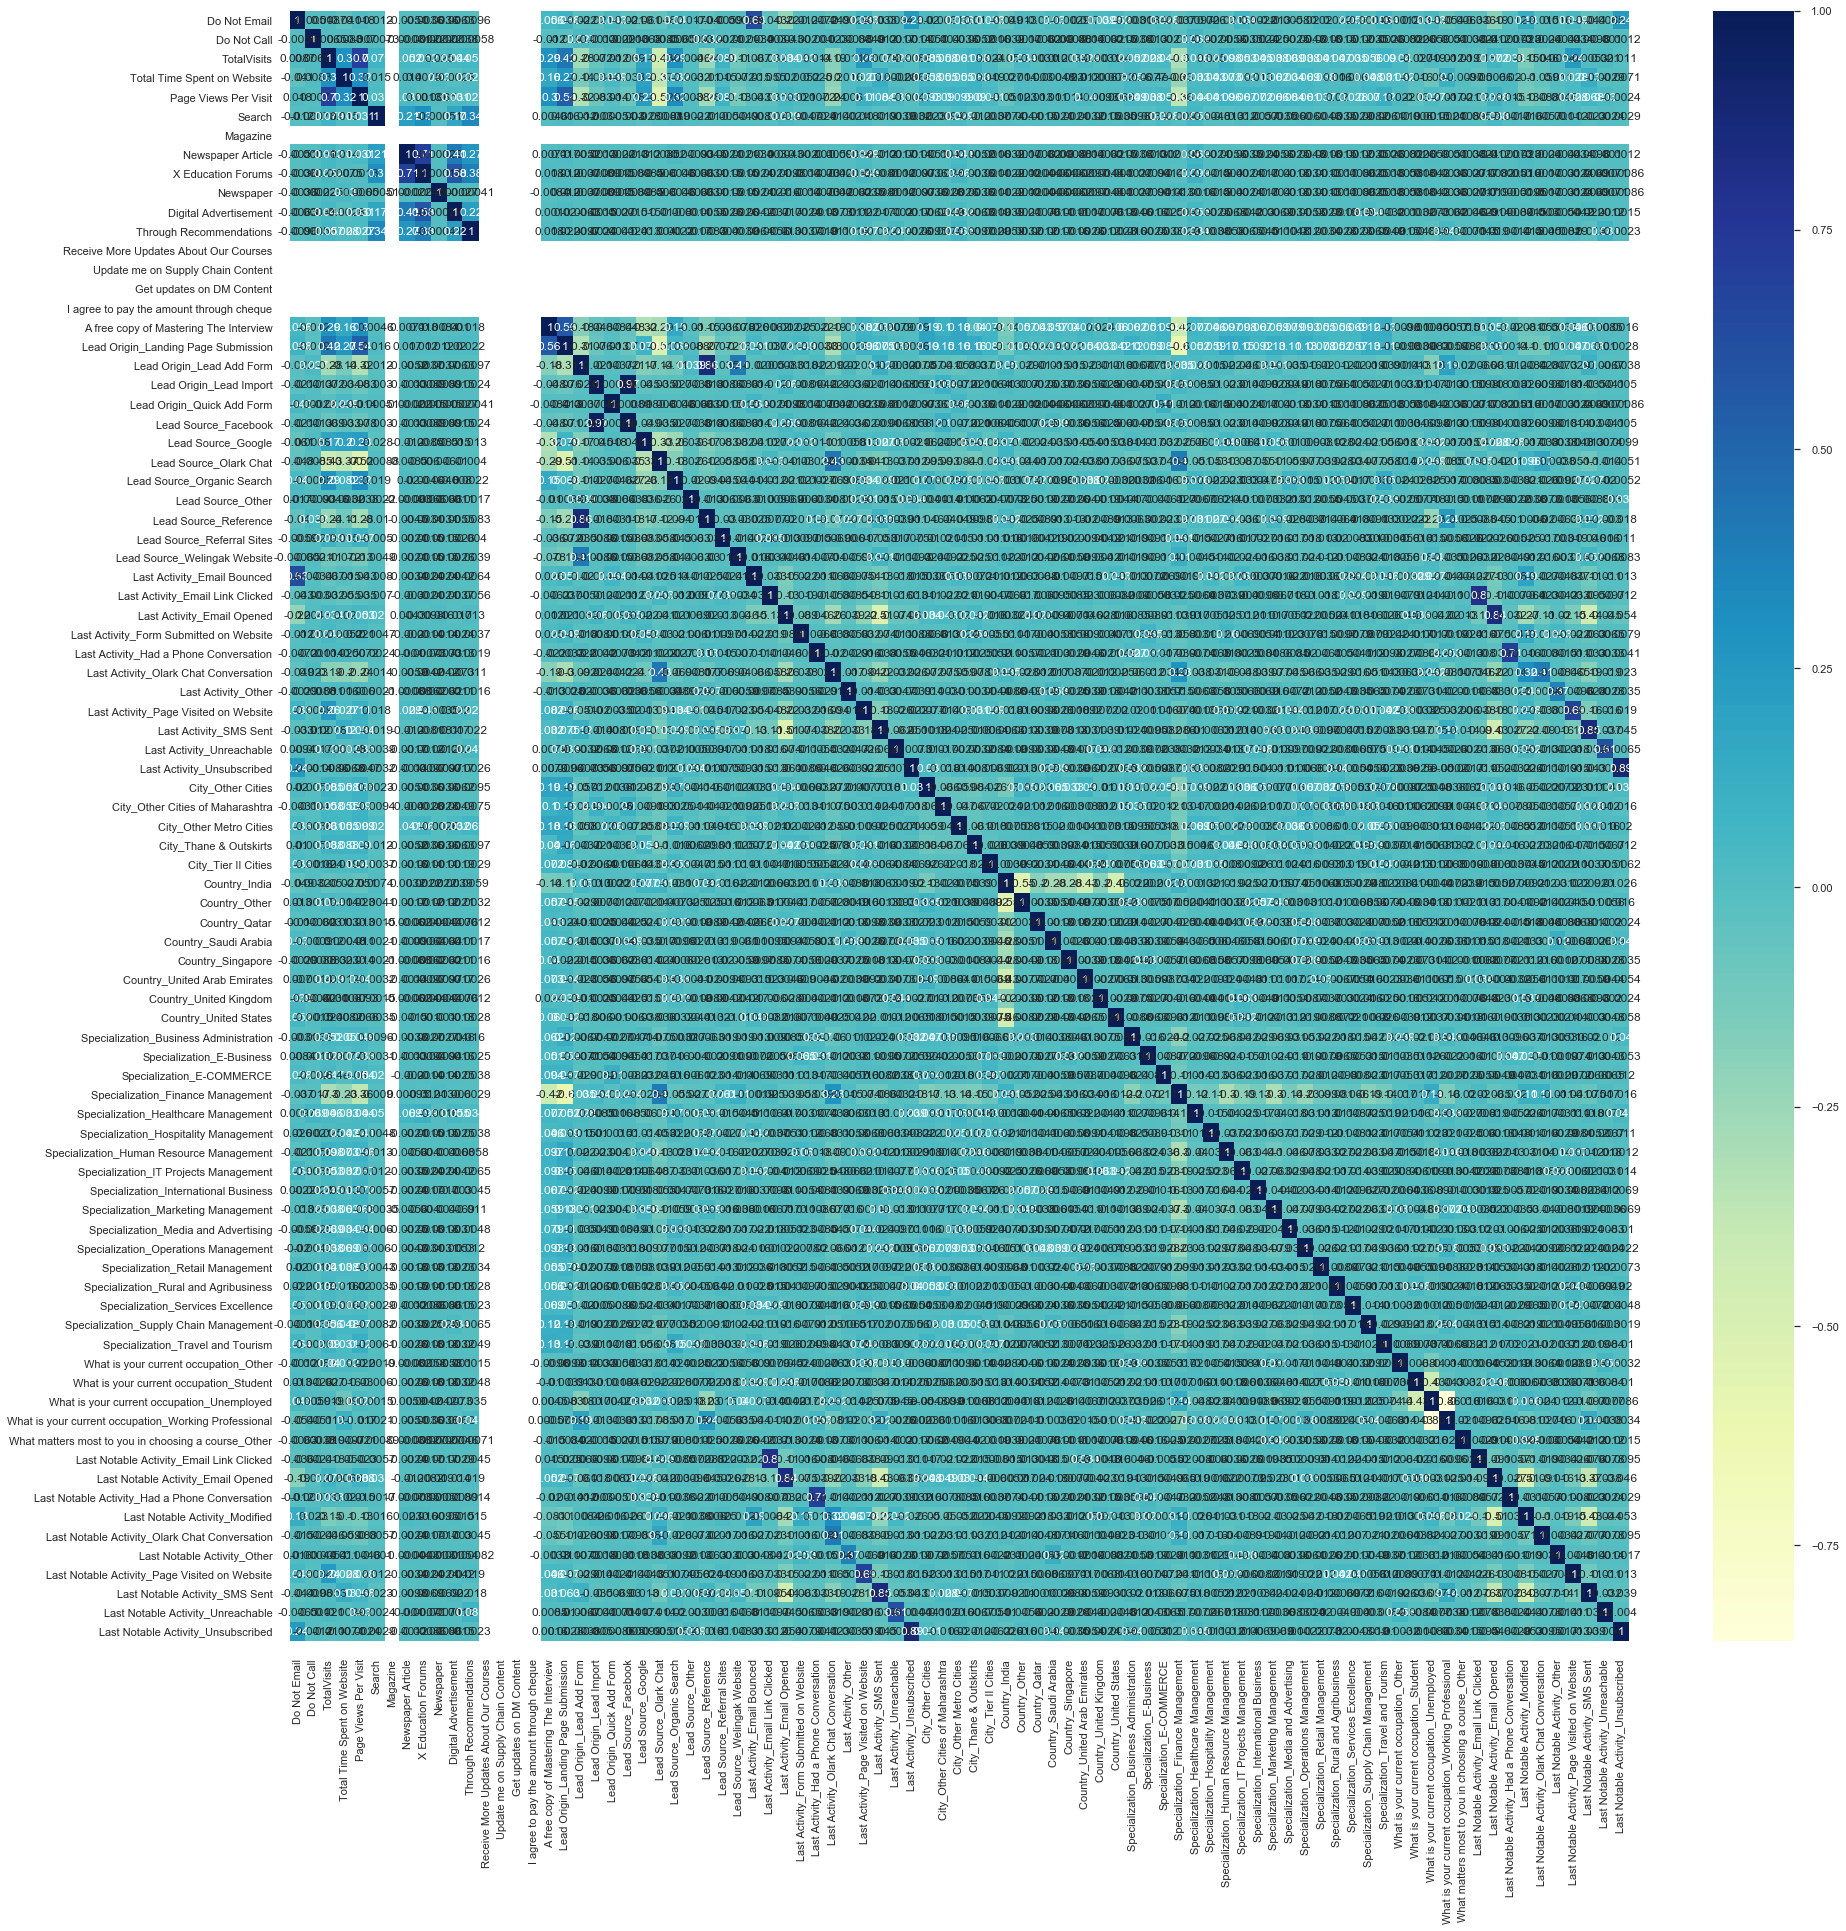

In [99]:
plt.figure(figsize = (30,30))
sns.heatmap(X_train.corr(),annot = True, cmap = "YlGnBu")
plt.show()

## 3. Modelling

As we have many columns in total, we can build model using RFE to select features.We can start ith 20 columns and the drop column one by one by inspecting the adjusted R-squared, R-squared, P-value and VIF. We will be using SKlearn for the the modelling after RFE

#### Running the First Training Model

In [100]:
import statsmodels.api as sm

In [101]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6387
Model Family:                Binomial   Df Model:                           80
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2599.7
Date:                Sun, 22 Nov 2020   Deviance:                       5199.3
Time:                        23:10:42   Pearson chi2:                 7.47e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.6955   2.26e+04      0.001      0.999   -4.43e+04    4.43e+04
Do Not Email                                            -1.1368      0.217     -5.235      0.000      -1.562      -0.711
Do Not Call                                             22.8585    5.4e+04      0.000      1.000   -1.06e+05    1.06e+05
TotalVisits                                              0.0952      0.016      6.084      0.000       0.064       0.126
Total Time Spent on Website                              0.0020   7.43e-05     26.846      0.000       0.002       0.002
Page Views Per Visit                                    -0.1224      0.029     -4.231      0.000      -0.179      -0.066
Search                                                   0.3700      0.777      0.476      0.634      -1.152       1.892
Magazine                                             -2.363e-09   1.76e-05     -0.000      1.000   -3.46e-05    3.46e-05
Newspaper Article                                       24.8820   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
X Education Forums                                     -27.2206   1.26e+05     -0.000      1.000   -2.46e+05    2.46e+05
Newspaper                                              -24.9349   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Digital Advertisement                                  -22.6544   5.62e+04     -0.000      1.000    -1.1e+05     1.1e+05
Through Recommendations                                  1.2817      1.389      0.923      0.356      -1.441       4.005
Receive More Updates About Our Courses               -2.192e-09   8.39e-06     -0.000      1.000   -1.64e-05    1.64e-05
Update me on Supply Chain Content                     3.081e-09   1.06e-05      0.000      1.000   -2.07e-05    2.07e-05
Get updates on DM Content                             7.474e-11   8.15e-06   9.17e-06      1.000    -1.6e-05     1.6e-05
I agree to pay the amount through cheque             -5.223e-09   1.94e-05     -0.000      1.000    -3.8e-05     3.8e-05
A free copy of Mastering The Interview                  -0.1289      0.110     -1.176      0.239      -0.344       0.086
Lead Origin_Landing Page Submission                     -0.4149      0.120     -3.452      0.001      -0.651      -0.179
Lead Origin_Lead Add Form                                2.8943      0.515      5.619      0.000       1.885       3.904
Lead Origin_Lead Import                                  0.2803      2.096      0.134      0.894      -3.828       4.389
Lead Origin_Quick Add Form                              23.0225   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                    -0

Feature Selection Using RFE and manual (hybrid) approach

In [102]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [103]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)     #selecting 20 features          
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([ True,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True,  True, False, False,
       False, False,  True, False])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 60),
 ('Page Views Per Visit', False, 43),
 ('Search', False, 21),
 ('Magazine', False, 62),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 31),
 ('Newspaper', False, 33),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 3),
 ('Receive More Updates About Our Courses', False, 64),
 ('Update me on Supply Chain Content', False, 63),
 ('Get updates on DM Content', False, 65),
 ('I agree to pay the amount through cheque', False, 66),
 ('A free copy of Mastering The Interview', False, 48),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 4),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', False, 40),
 ('Lead Source_Organic Search', False, 58),
 ('Lead Sour

In [106]:
# Columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'Digital Advertisement',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Qatar', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [107]:
# Columns where RFE support is False

not_RFE_col = X_train.columns[~rfe.support_]
print(not_RFE_col)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Ot

####  Lets now check the summary of the model using statsmodels


Assessing the model with StatsModels

In [108]:
import statsmodels.api as sm

In [109]:
X_train_RFE = X_train[col]
X_train_RFE.head()

Do Not Email  Do Not Call  \
Prospect ID                                                       
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3             0            0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b             0            0   
db308a34-ade6-4f0d-9779-586c5be188c7             0            0   
1199b37d-f610-4bb8-bf18-15267dec61fa             0            0   
6b2d3b2f-9990-449c-9333-012b578e39c8             0            0   

                                      Digital Advertisement  \
Prospect ID                                                   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                      0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                      0   
db308a34-ade6-4f0d-9779-586c5be188c7                      0   
1199b37d-f610-4bb8-bf18-15267dec61fa                      0   
6b2d3b2f-9990-449c-9333-012b578e39c8                      0   

                                      Lead Origin_Lead Add Form  \
Prospect ID                                                       
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                          0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                          0   
db308a34-ade6-4f0d-9779-586c5be188c7                          0   
1199b37d-f610-4bb8-bf18-15267dec61fa                          0   
6b2d3b2f-9990-449c-9333-012b578e39c8                          0   

                                      Lead Origin_Quick Add Form  \
Prospect ID                                                        
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                           0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                           0   
db308a34-ade6-4f0d-9779-586c5be188c7                           0   
1199b37d-f610-4bb8-bf18-15267dec61fa                           0   
6b2d3b2f-9990-449c-9333-012b578e39c8                           0   

                                      Lead Source_Welingak Website  \
Prospect ID                                                          
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                             0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                             0   
db308a34-ade6-4f0d-9779-586c5be188c7                             0   
1199b37d-f610-4bb8-bf18-15267dec61fa                             0   
6b2d3b2f-9990-449c-9333-012b578e39c8                             0   

                                      Last Activity_Email Opened  \
Prospect ID                                                        
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                           1   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                           1   
db308a34-ade6-4f0d-9779-586c5be188c7                           1   
1199b37d-f610-4bb8-bf18-15267dec61fa                           0   
6b2d3b2f-9990-449c-9333-012b578e39c8                           1   

                                      Last Activity_Had a Phone Conversation  \
Prospect ID                                                                    
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                       0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                       0   
db308a34-ade6-4f0d-9779-586c5be188c7                                       0   
1199b37d-f610-4bb8-bf18-15267dec61fa                                       0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                       0   

                                      Last Activity_Olark Chat Conversation  \
Prospect ID                                                                   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                      0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                      0   
db308a34-ade6-4f0d-9779-586c5be188c7                                      0   
1199b37d-f610-4bb8-bf18-15267dec61fa                                      0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                      0   

                                      Last Activity_Other  \
Prospect ID                        

### 1st Model

In [110]:
# adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3136.5
Date:                Sun, 22 Nov 2020   Deviance:                       6273.1
Time:                        23:10:52   Pearson chi2:                 7.03e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7179      0.514      1.396      0.163      -0.290       1.726
Do Not Email                                            -1.1828      0.159     -7.437      0.000      -1.495      -0.871
Do Not Call                                             23.2373   3.32e+04      0.001      0.999   -6.51e+04    6.51e+04
Digital Advertisement                                  -22.3875   2.46e+04     -0.001      0.999   -4.81e+04    4.81e+04
Lead Origin_Lead Add Form                                2.6932      0.184     14.627      0.000       2.332       3.054
Lead Origin_Quick Add Form                              25.8234   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                             1.7853      0.742      2.407      0.016       0.332       3.239
Last Activity_Email Opened                               0.9530      0.147      6.488      0.000       0.665       1.241
Last Activity_Had a Phone Conversation                   2.0279      0.867      2.338      0.019       0.328       3.728
Last Activity_Olark Chat Conversation                   -0.6655      0.169     -3.946      0.000      -0.996      -0.335
Last Activity_Other                                      2.2112      0.628      3.519      0.000       0.980       3.443
Last Activity_SMS Sent                                   1.4500      0.103     14.097      0.000       1.248       1.652
Country_Qatar                                          -22.0911   1.62e+04     -0.001      0.999   -3.18e+04    3.18e+04
Country_Saudi Arabia                                    -1.2390      0.710     -1.746      0.081      -2.630       0.152
What is your current occupation_Student                 -1.3625      0.548     -2.488      0.013      -2.436      -0.289
What is your current occupation_Unemployed              -1.7303      0.508     -3.406      0.001      -2.726      -0.735
What is your current occupation_Working Professional     1.2334      0.537      2.299      0.022       0.182       2.285
Last Notable Activity_Email Opened                      -0.8253      0.156     -5.298      0.000      -1.131      -0.520
Last Notable Activity_Had a Phone Conversation           1.0782      1.369      0.787      0.431      -1.606       3.762
Last Notable Activity_Modified                          -1.0621      0.095    -11.123      0.000      -1.249      -0.875
Last Notable Activity_Unreachable                        1.2558      0.488      2.572      0.010       0.299       2.213
========================================================================================================================
"""

### Lets check for multicollinearity among these variables

Checking VIF
Variance Inflation Factor or VIF, helps us in detecting associations among predictors and gives a basic quantitative idea about how well one independent variable is explained by all the other independent variables combined.The formula for calculating VIF is:

VIF=1/(1−R2) ¶

In [111]:
# Calculate the VIFs for the 1st model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF


vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
14         What is your current occupation_Unemployed  8.93
16                 Last Notable Activity_Email Opened  7.88
6                          Last Activity_Email Opened  7.76
18                     Last Notable Activity_Modified  3.31
10                             Last Activity_SMS Sent  3.22
7              Last Activity_Had a Phone Conversation  2.03
17     Last Notable Activity_Had a Phone Conversation  2.02
15  What is your current occupation_Working Profes...  1.75
8               Last Activity_Olark Chat Conversation  1.59
3                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.25
5                        Lead Source_Welingak Website  1.24
13            What is your current occupation_Student  1.20
19                  Last Notable Activity_Unreachable  1.03
9                                 Last Activity_Other  1.02
12                               Country_Saudi Arabia  1.01
11                                      Country_Qatar  1.00
1                                         Do Not Call  1.00
4                          Lead Origin_Quick Add Form  1.00
2                               Digital Advertisement  1.00

#### Lead Origin_Quick Add Form has high p value  and can be dropped

### 2nd model

In [112]:
# Drop Lead Origin_Quick Add Form

X_train_RFE = X_train_RFE.drop(["Lead Origin_Quick Add Form"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Do Not Call', 'Digital Advertisement',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Qatar', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [113]:
#Rebuliding the second model without Lead Origin_Quick Add Form

col = col.drop('Lead Origin_Quick Add Form', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.8
Date:                Sun, 22 Nov 2020   Deviance:                       6279.6
Time:                        23:10:53   Pearson chi2:                 7.04e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7168      0.514      1.395      0.163      -0.290       1.724
Do Not Email                                            -1.1619      0.158     -7.348      0.000      -1.472      -0.852
Do Not Call                                             23.2376   3.32e+04      0.001      0.999   -6.51e+04    6.51e+04
Digital Advertisement                                  -22.3865   2.46e+04     -0.001      0.999   -4.82e+04    4.81e+04
Lead Origin_Lead Add Form                                2.6899      0.184     14.622      0.000       2.329       3.050
Lead Source_Welingak Website                             1.7852      0.742      2.408      0.016       0.332       3.239
Last Activity_Email Opened                               0.9478      0.147      6.459      0.000       0.660       1.235
Last Activity_Had a Phone Conversation                   2.0199      0.867      2.331      0.020       0.322       3.718
Last Activity_Olark Chat Conversation                   -0.6699      0.169     -3.974      0.000      -1.000      -0.340
Last Activity_Other                                      2.2051      0.628      3.512      0.000       0.974       3.436
Last Activity_SMS Sent                                   1.4466      0.103     14.082      0.000       1.245       1.648
Country_Qatar                                          -22.0903   1.62e+04     -0.001      0.999   -3.18e+04    3.18e+04
Country_Saudi Arabia                                    -1.2413      0.709     -1.750      0.080      -2.632       0.149
What is your current occupation_Student                 -1.3610      0.547     -2.487      0.013      -2.434      -0.288
What is your current occupation_Unemployed              -1.7277      0.508     -3.404      0.001      -2.723      -0.733
What is your current occupation_Working Professional     1.2335      0.536      2.301      0.021       0.183       2.284
Last Notable Activity_Email Opened                      -0.8214      0.156     -5.275      0.000      -1.127      -0.516
Last Notable Activity_Had a Phone Conversation           1.0848      1.369      0.793      0.428      -1.598       3.768
Last Notable Activity_Modified                          -1.0579      0.095    -11.091      0.000      -1.245      -0.871
Last Notable Activity_Unreachable                        1.2535      0.488      2.568      0.010       0.297       2.210
========================================================================================================================
"""

In [114]:
# Calculate the VIFs for the 2nd model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13         What is your current occupation_Unemployed  8.93
15                 Last Notable Activity_Email Opened  7.88
5                          Last Activity_Email Opened  7.76
17                     Last Notable Activity_Modified  3.31
9                              Last Activity_SMS Sent  3.22
6              Last Activity_Had a Phone Conversation  2.03
16     Last Notable Activity_Had a Phone Conversation  2.02
14  What is your current occupation_Working Profes...  1.75
7               Last Activity_Olark Chat Conversation  1.59
3                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
4                        Lead Source_Welingak Website  1.24
12            What is your current occupation_Student  1.20
18                  Last Notable Activity_Unreachable  1.03
8                                 Last Activity_Other  1.02
11                               Country_Saudi Arabia  1.01
10                                      Country_Qatar  1.00
1                                         Do Not Call  1.00
2                               Digital Advertisement  1.00

#### Digital Advertisement has high p value  and can be dropped

### 3rd model

In [115]:
#Drop Digital Advertisement

X_train_RFE = X_train_RFE.drop(["Digital Advertisement"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Do Not Call', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Qatar', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [116]:
#Rebuliding the second model without Digital Advertisement

col = col.drop('Digital Advertisement', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3141.8
Date:                Sun, 22 Nov 2020   Deviance:                       6283.6
Time:                        23:10:53   Pearson chi2:                 7.04e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7147      0.514      1.391      0.164      -0.292       1.722
Do Not Email                                            -1.1598      0.158     -7.335      0.000      -1.470      -0.850
Do Not Call                                             23.2372   3.32e+04      0.001      0.999   -6.51e+04    6.51e+04
Lead Origin_Lead Add Form                                2.6906      0.184     14.628      0.000       2.330       3.051
Lead Source_Welingak Website                             1.7855      0.741      2.408      0.016       0.332       3.239
Last Activity_Email Opened                               0.9479      0.147      6.460      0.000       0.660       1.236
Last Activity_Had a Phone Conversation                   2.0198      0.866      2.331      0.020       0.322       3.718
Last Activity_Olark Chat Conversation                   -0.6691      0.169     -3.970      0.000      -0.999      -0.339
Last Activity_Other                                      2.2054      0.628      3.512      0.000       0.975       3.436
Last Activity_SMS Sent                                   1.4449      0.103     14.066      0.000       1.244       1.646
Country_Qatar                                          -22.0884   1.62e+04     -0.001      0.999   -3.18e+04    3.18e+04
Country_Saudi Arabia                                    -1.2400      0.709     -1.748      0.080      -2.630       0.150
What is your current occupation_Student                 -1.3604      0.547     -2.486      0.013      -2.433      -0.288
What is your current occupation_Unemployed              -1.7278      0.508     -3.404      0.001      -2.723      -0.733
What is your current occupation_Working Professional     1.2343      0.536      2.302      0.021       0.183       2.285
Last Notable Activity_Email Opened                      -0.8194      0.156     -5.263      0.000      -1.125      -0.514
Last Notable Activity_Had a Phone Conversation           1.0870      1.369      0.794      0.427      -1.596       3.770
Last Notable Activity_Modified                          -1.0560      0.095    -11.072      0.000      -1.243      -0.869
Last Notable Activity_Unreachable                        1.2556      0.488      2.573      0.010       0.299       2.212
========================================================================================================================
"""

In [117]:
# Calculate the VIFs for the 3rd model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12         What is your current occupation_Unemployed  8.93
14                 Last Notable Activity_Email Opened  7.88
4                          Last Activity_Email Opened  7.76
16                     Last Notable Activity_Modified  3.31
8                              Last Activity_SMS Sent  3.22
5              Last Activity_Had a Phone Conversation  2.03
15     Last Notable Activity_Had a Phone Conversation  2.02
13  What is your current occupation_Working Profes...  1.75
6               Last Activity_Olark Chat Conversation  1.59
2                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
3                        Lead Source_Welingak Website  1.24
11            What is your current occupation_Student  1.20
17                  Last Notable Activity_Unreachable  1.03
7                                 Last Activity_Other  1.02
10                               Country_Saudi Arabia  1.01
1                                         Do Not Call  1.00
9                                       Country_Qatar  1.00

### 4th model

In [118]:
#Drop Do Not Call

X_train_RFE = X_train_RFE.drop(["Do Not Call"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Qatar', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [119]:
#Rebuliding the second model without Do Not Call

col = col.drop('Do Not Call', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3143.9
Date:                Sun, 22 Nov 2020   Deviance:                       6287.8
Time:                        23:10:54   Pearson chi2:                 7.06e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7114      0.514      1.385      0.166      -0.295       1.718
Do Not Email                                            -1.1608      0.158     -7.339      0.000      -1.471      -0.851
Lead Origin_Lead Add Form                                2.7051      0.184     14.696      0.000       2.344       3.066
Lead Source_Welingak Website                             1.7692      0.742      2.386      0.017       0.316       3.223
Last Activity_Email Opened                               0.9557      0.147      6.522      0.000       0.669       1.243
Last Activity_Had a Phone Conversation                   2.0190      0.867      2.329      0.020       0.320       3.718
Last Activity_Olark Chat Conversation                   -0.6582      0.168     -3.925      0.000      -0.987      -0.329
Last Activity_Other                                      2.2045      0.628      3.510      0.000       0.973       3.436
Last Activity_SMS Sent                                   1.4454      0.103     14.069      0.000       1.244       1.647
Country_Qatar                                          -22.0888   1.62e+04     -0.001      0.999   -3.18e+04    3.18e+04
Country_Saudi Arabia                                    -1.2389      0.709     -1.747      0.081      -2.629       0.151
What is your current occupation_Student                 -1.3603      0.547     -2.486      0.013      -2.433      -0.288
What is your current occupation_Unemployed              -1.7255      0.508     -3.400      0.001      -2.720      -0.731
What is your current occupation_Working Professional     1.2351      0.536      2.304      0.021       0.184       2.286
Last Notable Activity_Email Opened                      -0.8264      0.155     -5.315      0.000      -1.131      -0.522
Last Notable Activity_Had a Phone Conversation           1.0889      1.369      0.795      0.426      -1.594       3.772
Last Notable Activity_Modified                          -1.0547      0.095    -11.062      0.000      -1.242      -0.868
Last Notable Activity_Unreachable                        1.2566      0.488      2.575      0.010       0.300       2.213
========================================================================================================================
"""

In [120]:
# Calculate the VIFs for the 4th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
11         What is your current occupation_Unemployed  8.93
13                 Last Notable Activity_Email Opened  7.87
3                          Last Activity_Email Opened  7.75
15                     Last Notable Activity_Modified  3.31
7                              Last Activity_SMS Sent  3.22
4              Last Activity_Had a Phone Conversation  2.03
14     Last Notable Activity_Had a Phone Conversation  2.02
12  What is your current occupation_Working Profes...  1.75
5               Last Activity_Olark Chat Conversation  1.59
1                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
2                        Lead Source_Welingak Website  1.24
10            What is your current occupation_Student  1.20
16                  Last Notable Activity_Unreachable  1.03
6                                 Last Activity_Other  1.02
9                                Country_Saudi Arabia  1.01
8                                       Country_Qatar  1.00

### 5th model

In [121]:
#Drop Country_Qatar

X_train_RFE = X_train_RFE.drop(["Country_Qatar"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [122]:
#Rebuliding the second model without Country_Qatar

col = col.drop('Country_Qatar', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3147.8
Date:                Sun, 22 Nov 2020   Deviance:                       6295.6
Time:                        23:10:54   Pearson chi2:                 7.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7115      0.514      1.385      0.166      -0.295       1.718
Do Not Email                                            -1.1592      0.158     -7.330      0.000      -1.469      -0.849
Lead Origin_Lead Add Form                                2.7075      0.184     14.712      0.000       2.347       3.068
Lead Source_Welingak Website                             1.7696      0.742      2.386      0.017       0.316       3.223
Last Activity_Email Opened                               0.9518      0.146      6.497      0.000       0.665       1.239
Last Activity_Had a Phone Conversation                   2.0180      0.867      2.328      0.020       0.319       3.717
Last Activity_Olark Chat Conversation                   -0.6582      0.168     -3.925      0.000      -0.987      -0.329
Last Activity_Other                                      2.2038      0.628      3.509      0.000       0.973       3.435
Last Activity_SMS Sent                                   1.4432      0.103     14.047      0.000       1.242       1.645
Country_Saudi Arabia                                    -1.2362      0.709     -1.743      0.081      -2.626       0.154
What is your current occupation_Student                 -1.3592      0.547     -2.485      0.013      -2.431      -0.287
What is your current occupation_Unemployed              -1.7274      0.507     -3.404      0.001      -2.722      -0.733
What is your current occupation_Working Professional     1.2356      0.536      2.306      0.021       0.185       2.286
Last Notable Activity_Email Opened                      -0.8247      0.155     -5.305      0.000      -1.129      -0.520
Last Notable Activity_Had a Phone Conversation           1.0916      1.369      0.797      0.425      -1.592       3.775
Last Notable Activity_Modified                          -1.0525      0.095    -11.038      0.000      -1.239      -0.866
Last Notable Activity_Unreachable                        1.2582      0.488      2.578      0.010       0.302       2.215
========================================================================================================================
"""

In [123]:
# Calculate the VIFs for the 5th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  8.92
12                 Last Notable Activity_Email Opened  7.87
3                          Last Activity_Email Opened  7.75
14                     Last Notable Activity_Modified  3.31
7                              Last Activity_SMS Sent  3.22
4              Last Activity_Had a Phone Conversation  2.03
13     Last Notable Activity_Had a Phone Conversation  2.02
11  What is your current occupation_Working Profes...  1.75
5               Last Activity_Olark Chat Conversation  1.59
1                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
2                        Lead Source_Welingak Website  1.24
9             What is your current occupation_Student  1.20
15                  Last Notable Activity_Unreachable  1.03
6                                 Last Activity_Other  1.02
8                                Country_Saudi Arabia  1.01

### 6th model

In [124]:
#Drop Last Notable Activity_Had a Phone Conversation

X_train_RFE = X_train_RFE.drop(["Last Notable Activity_Had a Phone Conversation"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'Country_Saudi Arabia',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [125]:
#Rebuliding the 6th model without Last Notable Activity_Had a Phone Conversation

col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3148.1
Date:                Sun, 22 Nov 2020   Deviance:                       6296.2
Time:                        23:10:54   Pearson chi2:                 7.24e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7159      0.514      1.394      0.163      -0.291       1.723
Do Not Email                                            -1.1617      0.158     -7.346      0.000      -1.472      -0.852
Lead Origin_Lead Add Form                                2.7071      0.184     14.706      0.000       2.346       3.068
Lead Source_Welingak Website                             1.7705      0.742      2.388      0.017       0.317       3.224
Last Activity_Email Opened                               0.9541      0.146      6.513      0.000       0.667       1.241
Last Activity_Had a Phone Conversation                   2.5179      0.621      4.055      0.000       1.301       3.735
Last Activity_Olark Chat Conversation                   -0.6577      0.168     -3.922      0.000      -0.986      -0.329
Last Activity_Other                                      2.2055      0.628      3.511      0.000       0.974       3.437
Last Activity_SMS Sent                                   1.4410      0.103     14.030      0.000       1.240       1.642
Country_Saudi Arabia                                    -1.2369      0.709     -1.744      0.081      -2.627       0.153
What is your current occupation_Student                 -1.3598      0.547     -2.485      0.013      -2.432      -0.287
What is your current occupation_Unemployed              -1.7281      0.508     -3.405      0.001      -2.723      -0.733
What is your current occupation_Working Professional     1.2342      0.536      2.302      0.021       0.184       2.285
Last Notable Activity_Email Opened                      -0.8307      0.155     -5.350      0.000      -1.135      -0.526
Last Notable Activity_Modified                          -1.0584      0.095    -11.130      0.000      -1.245      -0.872
Last Notable Activity_Unreachable                        1.2546      0.488      2.571      0.010       0.298       2.211
========================================================================================================================
"""

In [126]:
# Calculate the VIFs for the 6th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
10         What is your current occupation_Unemployed  8.89
12                 Last Notable Activity_Email Opened  7.85
3                          Last Activity_Email Opened  7.75
13                     Last Notable Activity_Modified  3.28
7                              Last Activity_SMS Sent  3.22
11  What is your current occupation_Working Profes...  1.75
5               Last Activity_Olark Chat Conversation  1.59
1                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
2                        Lead Source_Welingak Website  1.24
9             What is your current occupation_Student  1.20
14                  Last Notable Activity_Unreachable  1.03
4              Last Activity_Had a Phone Conversation  1.02
6                                 Last Activity_Other  1.02
8                                Country_Saudi Arabia  1.01

## 7th model

In [127]:
#Drop What is your Country_Saudi Arabia	

X_train_RFE = X_train_RFE.drop(["Country_Saudi Arabia"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [128]:
#Rebuliding the 7th model without Country_Saudi Arabia

col = col.drop('Country_Saudi Arabia', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3150.0
Date:                Sun, 22 Nov 2020   Deviance:                       6299.9
Time:                        23:10:55   Pearson chi2:                 7.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7136      0.514      1.390      0.165      -0.293       1.720
Do Not Email                                            -1.1735      0.158     -7.425      0.000      -1.483      -0.864
Lead Origin_Lead Add Form                                2.7108      0.184     14.725      0.000       2.350       3.072
Lead Source_Welingak Website                             1.7698      0.742      2.387      0.017       0.316       3.223
Last Activity_Email Opened                               0.9523      0.146      6.503      0.000       0.665       1.239
Last Activity_Had a Phone Conversation                   2.5199      0.621      4.058      0.000       1.303       3.737
Last Activity_Olark Chat Conversation                   -0.6571      0.168     -3.919      0.000      -0.986      -0.328
Last Activity_Other                                      2.1027      0.613      3.431      0.001       0.901       3.304
Last Activity_SMS Sent                                   1.4412      0.103     14.038      0.000       1.240       1.642
What is your current occupation_Student                 -1.3715      0.547     -2.506      0.012      -2.444      -0.299
What is your current occupation_Unemployed              -1.7294      0.507     -3.408      0.001      -2.724      -0.735
What is your current occupation_Working Professional     1.2295      0.536      2.294      0.022       0.179       2.280
Last Notable Activity_Email Opened                      -0.8289      0.155     -5.339      0.000      -1.133      -0.525
Last Notable Activity_Modified                          -1.0531      0.095    -11.082      0.000      -1.239      -0.867
Last Notable Activity_Unreachable                        1.2587      0.488      2.579      0.010       0.302       2.215
========================================================================================================================
"""

In [129]:
# Calculate the VIFs for the 7th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  8.88
11                 Last Notable Activity_Email Opened  7.85
3                          Last Activity_Email Opened  7.75
12                     Last Notable Activity_Modified  3.28
7                              Last Activity_SMS Sent  3.22
10  What is your current occupation_Working Profes...  1.75
5               Last Activity_Olark Chat Conversation  1.59
1                           Lead Origin_Lead Add Form  1.41
0                                        Do Not Email  1.24
2                        Lead Source_Welingak Website  1.24
8             What is your current occupation_Student  1.20
13                  Last Notable Activity_Unreachable  1.03
4              Last Activity_Had a Phone Conversation  1.02
6                                 Last Activity_Other  1.02

### 8th model

In [130]:
#Drop What is your current occupation_Unemployed

X_train_RFE = X_train_RFE.drop(["What is your current occupation_Unemployed"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent', 'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [131]:
#Rebuliding the 8th model without What is your current occupation_Unemployed

col = col.drop('What is your current occupation_Unemployed', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3155.9
Date:                Sun, 22 Nov 2020   Deviance:                       6311.8
Time:                        23:10:55   Pearson chi2:                 7.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0048      0.099    -10.115      0.000      -1.200      -0.810
Do Not Email                                            -1.1777      0.158     -7.453      0.000      -1.487      -0.868
Lead Origin_Lead Add Form                                2.7240      0.184     14.822      0.000       2.364       3.084
Lead Source_Welingak Website                             1.7501      0.741      2.360      0.018       0.297       3.203
Last Activity_Email Opened                               0.9464      0.146      6.477      0.000       0.660       1.233
Last Activity_Had a Phone Conversation                   2.5074      0.621      4.038      0.000       1.290       3.724
Last Activity_Olark Chat Conversation                   -0.6616      0.168     -3.949      0.000      -0.990      -0.333
Last Activity_Other                                      2.0883      0.613      3.407      0.001       0.887       3.290
Last Activity_SMS Sent                                   1.4297      0.102     13.955      0.000       1.229       1.630
What is your current occupation_Student                  0.3494      0.211      1.659      0.097      -0.063       0.762
What is your current occupation_Working Professional     2.9501      0.181     16.342      0.000       2.596       3.304
Last Notable Activity_Email Opened                      -0.8248      0.155     -5.323      0.000      -1.129      -0.521
Last Notable Activity_Modified                          -1.0490      0.095    -11.052      0.000      -1.235      -0.863
Last Notable Activity_Unreachable                        1.3186      0.483      2.730      0.006       0.372       2.265
========================================================================================================================
"""

In [132]:
# Calculate the VIFs for the 8th model

# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                          Last Activity_Email Opened  7.23
10                 Last Notable Activity_Email Opened  6.72
11                     Last Notable Activity_Modified  1.96
1                           Lead Origin_Lead Add Form  1.41
5               Last Activity_Olark Chat Conversation  1.35
2                        Lead Source_Welingak Website  1.24
7                              Last Activity_SMS Sent  1.18
9   What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.13
8             What is your current occupation_Student  1.03
4              Last Activity_Had a Phone Conversation  1.01
6                                 Last Activity_Other  1.01
12                  Last Notable Activity_Unreachable  1.00

### 9th model

In [133]:
#Drop What is your current occupation_Student

X_train_RFE = X_train_RFE.drop(["What is your current occupation_Student"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [134]:
#Rebuliding the 9th model without What is your current occupation_Student

col = col.drop('What is your current occupation_Student', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3157.2
Date:                Sun, 22 Nov 2020   Deviance:                       6314.5
Time:                        23:10:55   Pearson chi2:                 7.26e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9991      0.099    -10.068      0.000      -1.194      -0.805
Do Not Email                                            -1.1767      0.158     -7.443      0.000      -1.487      -0.867
Lead Origin_Lead Add Form                                2.7329      0.184     14.887      0.000       2.373       3.093
Lead Source_Welingak Website                             1.7341      0.741      2.339      0.019       0.281       3.187
Last Activity_Email Opened                               0.9482      0.146      6.490      0.000       0.662       1.235
Last Activity_Had a Phone Conversation                   2.5015      0.621      4.029      0.000       1.285       3.718
Last Activity_Olark Chat Conversation                   -0.6559      0.167     -3.916      0.000      -0.984      -0.328
Last Activity_Other                                      2.0820      0.613      3.396      0.001       0.880       3.284
Last Activity_SMS Sent                                   1.4281      0.102     13.945      0.000       1.227       1.629
What is your current occupation_Working Professional     2.9421      0.180     16.305      0.000       2.588       3.296
Last Notable Activity_Email Opened                      -0.8219      0.155     -5.306      0.000      -1.125      -0.518
Last Notable Activity_Modified                          -1.0487      0.095    -11.051      0.000      -1.235      -0.863
Last Notable Activity_Unreachable                        1.3129      0.483      2.719      0.007       0.366       2.259
========================================================================================================================
"""

In [135]:
# Calculate the VIFs for the 9th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                          Last Activity_Email Opened  7.23
9                  Last Notable Activity_Email Opened  6.71
10                     Last Notable Activity_Modified  1.95
1                           Lead Origin_Lead Add Form  1.41
5               Last Activity_Olark Chat Conversation  1.35
2                        Lead Source_Welingak Website  1.24
7                              Last Activity_SMS Sent  1.18
8   What is your current occupation_Working Profes...  1.16
0                                        Do Not Email  1.12
4              Last Activity_Had a Phone Conversation  1.01
6                                 Last Activity_Other  1.01
11                  Last Notable Activity_Unreachable  1.00

### 10th model

In [136]:
#Drop What is your Last Activity_Email Opened

X_train_RFE = X_train_RFE.drop(["Last Activity_Email Opened"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [137]:
#Rebuliding the 10th model without Last Activity_Email Opened

col = col.drop('Last Activity_Email Opened', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3177.8
Date:                Sun, 22 Nov 2020   Deviance:                       6355.5
Time:                        23:10:56   Pearson chi2:                 7.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8134      0.092     -8.848      0.000      -0.994      -0.633
Do Not Email                                            -1.3262      0.155     -8.558      0.000      -1.630      -1.022
Lead Origin_Lead Add Form                                2.8691      0.183     15.684      0.000       2.511       3.228
Lead Source_Welingak Website                             1.7569      0.742      2.368      0.018       0.303       3.211
Last Activity_Had a Phone Conversation                   2.2506      0.617      3.647      0.000       1.041       3.460
Last Activity_Olark Chat Conversation                   -0.9505      0.159     -5.979      0.000      -1.262      -0.639
Last Activity_Other                                      1.7698      0.613      2.888      0.004       0.569       2.971
Last Activity_SMS Sent                                   1.2138      0.094     12.929      0.000       1.030       1.398
What is your current occupation_Working Professional     2.9295      0.179     16.349      0.000       2.578       3.281
Last Notable Activity_Email Opened                      -0.0618      0.105     -0.590      0.555      -0.267       0.143
Last Notable Activity_Modified                          -0.8888      0.090     -9.907      0.000      -1.065      -0.713
Last Notable Activity_Unreachable                        1.1330      0.483      2.347      0.019       0.187       2.079
========================================================================================================================
"""

In [138]:
# Calculate the VIFs for the 10th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9                      Last Notable Activity_Modified  1.42
1                           Lead Origin_Lead Add Form  1.38
4               Last Activity_Olark Chat Conversation  1.25
2                        Lead Source_Welingak Website  1.24
7   What is your current occupation_Working Profes...  1.16
6                              Last Activity_SMS Sent  1.15
0                                        Do Not Email  1.09
8                  Last Notable Activity_Email Opened  1.03
3              Last Activity_Had a Phone Conversation  1.01
5                                 Last Activity_Other  1.01
10                  Last Notable Activity_Unreachable  1.00

### 11th model

In [139]:
#Drop Last Notable Activity_Email Opened Opened

X_train_RFE = X_train_RFE.drop(["Last Notable Activity_Email Opened"], axis = 1)
X_train_RFE.columns

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [140]:
#Rebuliding the 11th model without "Last Notable Activity_Email Opened"

col = col.drop('Last Notable Activity_Email Opened', 1)

#adding constant to the model

X_train_sm = sm.add_constant(X_train[col])

## Running the logistic model 
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3177.9
Date:                Sun, 22 Nov 2020   Deviance:                       6355.9
Time:                        23:10:56   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8607      0.045    -19.029      0.000      -0.949      -0.772
Do Not Email                                            -1.3110      0.153     -8.574      0.000      -1.611      -1.011
Lead Origin_Lead Add Form                                2.8733      0.183     15.708      0.000       2.515       3.232
Lead Source_Welingak Website                             1.7566      0.742      2.368      0.018       0.303       3.211
Last Activity_Had a Phone Conversation                   2.2819      0.614      3.719      0.000       1.079       3.484
Last Activity_Olark Chat Conversation                   -0.9256      0.153     -6.036      0.000      -1.226      -0.625
Last Activity_Other                                      1.7895      0.612      2.924      0.003       0.590       2.989
Last Activity_SMS Sent                                   1.2534      0.066     19.034      0.000       1.124       1.382
What is your current occupation_Working Professional     2.9318      0.179     16.359      0.000       2.581       3.283
Last Notable Activity_Modified                          -0.8574      0.072    -11.856      0.000      -0.999      -0.716
Last Notable Activity_Unreachable                        1.1795      0.476      2.477      0.013       0.246       2.113
========================================================================================================================
"""

In [141]:
# Calculate the VIFs for the 11th model

from statsmodels.stats.outliers_influence import variance_inflation_factor


# calculating VIF

vif = pd.DataFrame()
vif['Features'] = X_train_RFE.columns
vif['VIF'] = [variance_inflation_factor(X_train_RFE.values, i) for i in range(X_train_RFE.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8                     Last Notable Activity_Modified  1.42
1                          Lead Origin_Lead Add Form  1.38
4              Last Activity_Olark Chat Conversation  1.25
2                       Lead Source_Welingak Website  1.24
6                             Last Activity_SMS Sent  1.15
7  What is your current occupation_Working Profes...  1.14
0                                       Do Not Email  1.09
3             Last Activity_Had a Phone Conversation  1.01
5                                Last Activity_Other  1.01
9                  Last Notable Activity_Unreachable  1.00

The p-values looks significant for all variables. Also,Variables have low value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only.

### Predicted values on the train set

In [142]:
X_train_sm.columns

Index(['const', 'Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [143]:
X_train_sm.shape

(6468, 11)

In [144]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

Prospect ID
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0.297193
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0.297193
db308a34-ade6-4f0d-9779-586c5be188c7    0.297193
1199b37d-f610-4bb8-bf18-15267dec61fa    0.596926
6b2d3b2f-9990-449c-9333-012b578e39c8    0.152120
5d421eb5-c831-45eb-8c63-c21027815c13    0.965260
9c7cd0cc-69f2-462f-81fd-4a6d41b27ae7    0.297193
6cd7f6d3-4781-436d-978d-7381106e4f2b    0.998289
fe6757d1-331a-4f99-b8f9-f301e1cc02cc    0.152120
9cacdf88-efe0-4fdf-931e-da3e10be7cc7    0.596926
dtype: float64

In [145]:
#actual Converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_probability':y_train_pred})
y_train_pred_final.head()

Converted  Converted_probability
Prospect ID                                                           
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0               0.297193
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0               0.297193
db308a34-ade6-4f0d-9779-586c5be188c7          0               0.297193
1199b37d-f610-4bb8-bf18-15267dec61fa          0               0.596926
6b2d3b2f-9990-449c-9333-012b578e39c8          0               0.152120

In [146]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

Converted  Converted_probability  \
Prospect ID                                                              
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0               0.297193   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0               0.297193   
db308a34-ade6-4f0d-9779-586c5be188c7          0               0.297193   
1199b37d-f610-4bb8-bf18-15267dec61fa          0               0.596926   
6b2d3b2f-9990-449c-9333-012b578e39c8          0               0.152120   

                                      predicted  
Prospect ID                                      
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0  
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0  
db308a34-ade6-4f0d-9779-586c5be188c7          0  
1199b37d-f610-4bb8-bf18-15267dec61fa          1  
6b2d3b2f-9990-449c-9333-012b578e39c8          0

<!-- # Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708   -->

In [147]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3496  506]
 [ 944 1522]]


<pre>Predicted           not_converted  converted </pre>
<pre> Actual </pre>
<pre>not_converted          3496         506 </pre>
<pre>converted              944          1522</pre>

In [148]:
# Let's check the overall accuracy.
accuracy_train = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print("Train Data Accuracy: " +str(round(accuracy_train,4)))

Train Data Accuracy: 0.7758


## Metrics beyond simply accuracy

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6171938361719383

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.8735632183908046

In [152]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12643678160919541


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.7504930966469427


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7873873873873873


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [155]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [156]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_probability, drop_intermediate = False )

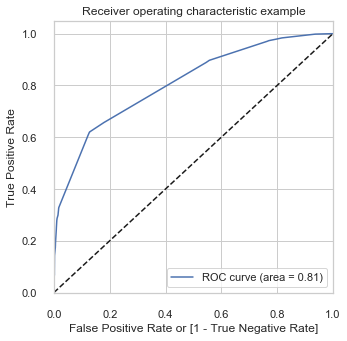

In [157]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [158]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_probability  \
Prospect ID                                                              
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0               0.297193   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0               0.297193   
db308a34-ade6-4f0d-9779-586c5be188c7          0               0.297193   
1199b37d-f610-4bb8-bf18-15267dec61fa          0               0.596926   
6b2d3b2f-9990-449c-9333-012b578e39c8          0               0.152120   

                                      predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
Prospect ID                                                                     
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0    1    1    1    0    0    0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0    1    1    1    0    0    0   
db308a34-ade6-4f0d-9779-586c5be188c7          0    1    1    1    0    0    0   
1199b37d-f610-4bb8-bf18-15267dec61fa          1    1    1    1    1    1    1   
6b2d3b2f-9990-449c-9333-012b578e39c8          0    1    1    0    0    0    0   

                                      0.6  0.7  0.8  0.9  
Prospect ID                                               
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0    0    0    0  
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0    0    0    0  
db308a34-ade6-4f0d-9779-586c5be188c7    0    0    0    0  
1199b37d-f610-4bb8-bf18-15267dec61fa    0    0    0    0  
6b2d3b2f-9990-449c-9333-012b578e39c8    0    0    0    0

In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.487941  0.983779  0.182409
0.2   0.2  0.615801  0.897405  0.442279
0.3   0.3  0.757421  0.658151  0.818591
0.4   0.4  0.776283  0.620032  0.872564
0.5   0.5  0.775819  0.617194  0.873563
0.6   0.6  0.733148  0.328873  0.982259
0.7   0.7  0.732375  0.325629  0.983008
0.8   0.8  0.720779  0.285888  0.988756
0.9   0.9  0.690322  0.197486  0.994003


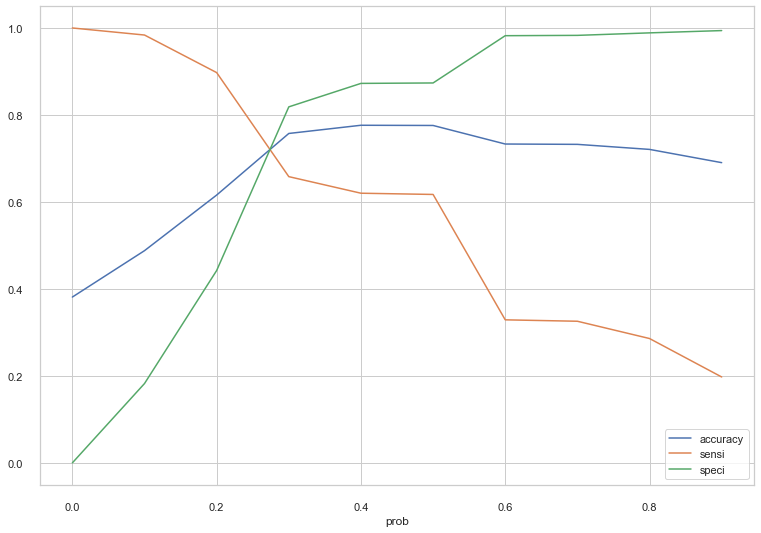

In [160]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
sns.set(style='whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [161]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_probability  \
Prospect ID                                                              
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0               0.297193   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0               0.297193   
db308a34-ade6-4f0d-9779-586c5be188c7          0               0.297193   
1199b37d-f610-4bb8-bf18-15267dec61fa          0               0.596926   
6b2d3b2f-9990-449c-9333-012b578e39c8          0               0.152120   

                                      predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
Prospect ID                                                                     
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0    1    1    1    0    0    0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0    1    1    1    0    0    0   
db308a34-ade6-4f0d-9779-586c5be188c7          0    1    1    1    0    0    0   
1199b37d-f610-4bb8-bf18-15267dec61fa          1    1    1    1    1    1    1   
6b2d3b2f-9990-449c-9333-012b578e39c8          0    1    1    0    0    0    0   

                                      0.6  0.7  0.8  0.9  final_predicted  
Prospect ID                                                                
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0    0    0    0                0  
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0    0    0    0                0  
db308a34-ade6-4f0d-9779-586c5be188c7    0    0    0    0                0  
1199b37d-f610-4bb8-bf18-15267dec61fa    0    0    0    0                1  
6b2d3b2f-9990-449c-9333-012b578e39c8    0    0    0    0                0

### Assigning Lead Score

In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_probability.map( lambda x: round((x*100),2))
y_train_pred_final.head()

Converted  Converted_probability  \
Prospect ID                                                              
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0               0.297193   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0               0.297193   
db308a34-ade6-4f0d-9779-586c5be188c7          0               0.297193   
1199b37d-f610-4bb8-bf18-15267dec61fa          0               0.596926   
6b2d3b2f-9990-449c-9333-012b578e39c8          0               0.152120   

                                      predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
Prospect ID                                                                     
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0    1    1    1    0    0    0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0    1    1    1    0    0    0   
db308a34-ade6-4f0d-9779-586c5be188c7          0    1    1    1    0    0    0   
1199b37d-f610-4bb8-bf18-15267dec61fa          1    1    1    1    1    1    1   
6b2d3b2f-9990-449c-9333-012b578e39c8          0    1    1    0    0    0    0   

                                      0.6  0.7  0.8  0.9  final_predicted  \
Prospect ID                                                                 
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3    0    0    0    0                0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b    0    0    0    0                0   
db308a34-ade6-4f0d-9779-586c5be188c7    0    0    0    0                0   
1199b37d-f610-4bb8-bf18-15267dec61fa    0    0    0    0                1   
6b2d3b2f-9990-449c-9333-012b578e39c8    0    0    0    0                0   

                                      Lead_Score  
Prospect ID                                       
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3       29.72  
207aaf73-a121-41b8-96bb-b0d5c38e7a7b       29.72  
db308a34-ade6-4f0d-9779-586c5be188c7       29.72  
1199b37d-f610-4bb8-bf18-15267dec61fa       59.69  
6b2d3b2f-9990-449c-9333-012b578e39c8       15.21

In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7574211502782932

In [164]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3276,  726],
       [ 843, 1623]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6581508515815085

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.8185907046476761

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.18140929535232383


In [169]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6909323116219668


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7953386744355426


### Values post optimal cut-off calculation on Train Set

- Train Data Accuracy:            0.75 
- Train Data Specificity:         0.80
- Train Data Sensitivity:         0.66 
- Train Data False postive rate:  0.19
- Train Data Positive predictive: 0.68 
- Train Data Negative predictive: 0.79 

### Precision and Recall

In [171]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
confusion

array([[3496,  506],
       [ 944, 1522]], dtype=int64)

In [172]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7504930966469427

In [173]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6171938361719383

Using sklearn utilities for the same

In [174]:
# Calculate Recall
recall_train = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall_train

0.6171938361719383

In [175]:
# Calculate Precision
precision_train = precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision_train

0.7504930966469427

In [176]:
# Calculate F1 Score
F1_score_train =  (2* precision_train * recall_train)/(precision_train + recall_train)
F1_score_train

0.6773475745438361

### Values post optimal cut-off calculation

- Train Data Precision:    0.75 
- Train Data Recall:       0.61
- Train Data F1 Score:     0.67

### Precision and recall tradeoff

In [177]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

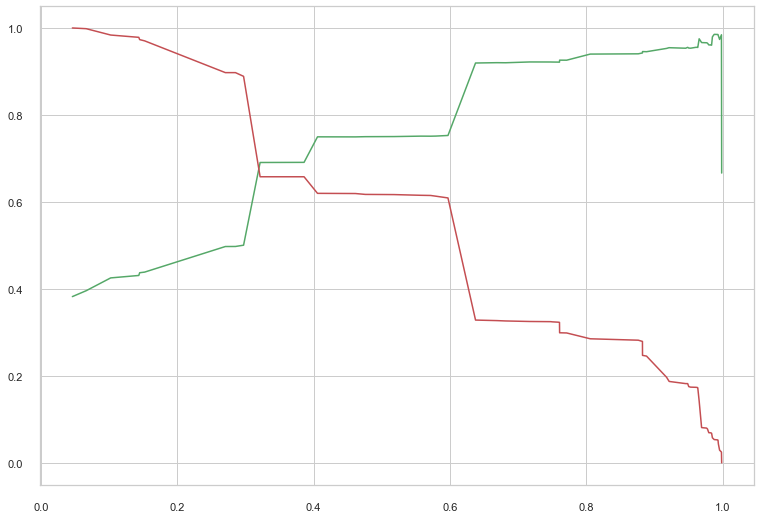

In [178]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the Test Set

In [179]:
#Preparing Test Dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  \
Prospect ID                                                                    
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3             0            0          0.0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b             0            0          4.0   
db308a34-ade6-4f0d-9779-586c5be188c7             0            0          5.0   
1199b37d-f610-4bb8-bf18-15267dec61fa             0            0          5.0   
6b2d3b2f-9990-449c-9333-012b578e39c8             0            0          0.0   

                                      Total Time Spent on Website  \
Prospect ID                                                         
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                            0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                          487   
db308a34-ade6-4f0d-9779-586c5be188c7                          106   
1199b37d-f610-4bb8-bf18-15267dec61fa                         1230   
6b2d3b2f-9990-449c-9333-012b578e39c8                            0   

                                      Page Views Per Visit  Search  Magazine  \
Prospect ID                                                                    
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                  0.00       0         0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                  1.33       0         0   
db308a34-ade6-4f0d-9779-586c5be188c7                  2.50       0         0   
1199b37d-f610-4bb8-bf18-15267dec61fa                  5.00       0         0   
6b2d3b2f-9990-449c-9333-012b578e39c8                  0.00       0         0   

                                      Newspaper Article  X Education Forums  \
Prospect ID                                                                   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                  0                   0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                  0                   0   
db308a34-ade6-4f0d-9779-586c5be188c7                  0                   0   
1199b37d-f610-4bb8-bf18-15267dec61fa                  0                   0   
6b2d3b2f-9990-449c-9333-012b578e39c8                  0                   0   

                                      Newspaper  ...  \
Prospect ID                                      ...   
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3          0  ...   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b          0  ...   
db308a34-ade6-4f0d-9779-586c5be188c7          0  ...   
1199b37d-f610-4bb8-bf18-15267dec61fa          0  ...   
6b2d3b2f-9990-449c-9333-012b578e39c8          0  ...   

                                      Last Notable Activity_Email Link Clicked  \
Prospect ID                                                                      
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                         0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                         0   
db308a34-ade6-4f0d-9779-586c5be188c7                                         0   
1199b37d-f610-4bb8-bf18-15267dec61fa                                         0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                         0   

                                      Last Notable Activity_Email Opened  \
Prospect ID                                                                
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                   1   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                   1   
db308a34-ade6-4f0d-9779-586c5be188c7                                   1   
1199b37d-f610-4bb8-bf18-15267dec61fa                                   0   
6b2d3b2f-9990-449c-9333-012b578e39c8                                   0   

                                      Last Notable Activity_Had a Phone Conversation  \
Prospect ID                                                                            
f3af2d98-02db-45d7-bbf6-c641d6b4f4c3                                               0   
207aaf73-a121-41b8-96bb-b0d5c38e7a7b                                               0   
db308a34-ade6-4f0d-9779-5

In [180]:
X_test = X_test[col]
X_test.head()

Do Not Email  Lead Origin_Lead Add Form  \
Prospect ID                                                                     
dd53b3eb-ae22-474c-b872-48b05bbe180b             0                          0   
7a960b03-466c-4e36-bf12-b755fc77a0b1             0                          1   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c             0                          0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408             0                          0   
f7ed6c72-7d36-413c-b2e0-414213c4ceef             0                          1   

                                      Lead Source_Welingak Website  \
Prospect ID                                                          
dd53b3eb-ae22-474c-b872-48b05bbe180b                             0   
7a960b03-466c-4e36-bf12-b755fc77a0b1                             0   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                             0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                             0   
f7ed6c72-7d36-413c-b2e0-414213c4ceef                             0   

                                      Last Activity_Had a Phone Conversation  \
Prospect ID                                                                    
dd53b3eb-ae22-474c-b872-48b05bbe180b                                       0   
7a960b03-466c-4e36-bf12-b755fc77a0b1                                       0   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                                       0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                                       0   
f7ed6c72-7d36-413c-b2e0-414213c4ceef                                       0   

                                      Last Activity_Olark Chat Conversation  \
Prospect ID                                                                   
dd53b3eb-ae22-474c-b872-48b05bbe180b                                      0   
7a960b03-466c-4e36-bf12-b755fc77a0b1                                      0   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                                      0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                                      1   
f7ed6c72-7d36-413c-b2e0-414213c4ceef                                      0   

                                      Last Activity_Other  \
Prospect ID                                                 
dd53b3eb-ae22-474c-b872-48b05bbe180b                    0   
7a960b03-466c-4e36-bf12-b755fc77a0b1                    0   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                    0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                    0   
f7ed6c72-7d36-413c-b2e0-414213c4ceef                    0   

                                      Last Activity_SMS Sent  \
Prospect ID                                                    
dd53b3eb-ae22-474c-b872-48b05bbe180b                       1   
7a960b03-466c-4e36-bf12-b755fc77a0b1                       1   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                       0   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                       0   
f7ed6c72-7d36-413c-b2e0-414213c4ceef                       0   

                                      What is your current occupation_Working Professional  \
Prospect ID                                                                                  
dd53b3eb-ae22-474c-b872-48b05bbe180b                                                  0      
7a960b03-466c-4e36-bf12-b755fc77a0b1                                                  0      
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                                                  1      
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                                                  0      
f7ed6c72-7d36-413c-b2e0-414213c4ceef                                                  0      

                                      Last Notable Activity_Modified  \
Prospect ID                                                            
dd53b3eb-ae22-474c-b872-48b05bbe180b                               0   
7a960b03-466c-4e36-bf12-b755fc77a0b1                               0   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c    

In [181]:
X_test_sm = sm.add_constant(X_test)

In [182]:
X_test_sm.shape

(2772, 11)

In [183]:
X_test.shape

(2772, 10)

In [184]:
y_test_pred = res.predict(X_test_sm)

In [185]:
y_test_pred[:10]

Prospect ID
dd53b3eb-ae22-474c-b872-48b05bbe180b    0.596926
7a960b03-466c-4e36-bf12-b755fc77a0b1    0.963243
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c    0.962697
6eb89ae5-d1e0-4c19-8661-8f9545e0e408    0.066380
f7ed6c72-7d36-413c-b2e0-414213c4ceef    0.882114
722962cb-c2c5-474b-9c10-b326bdd2d3b9    0.596926
ff1f908b-8168-4f19-8a0e-4ec50a31b719    0.297193
1662c0e4-0a8d-4440-a8cc-c4243e6ecd3a    0.297193
500143f6-7fe2-4f7d-a21f-21c0df203b45    0.152120
ffd5ccff-8ac4-4c03-ba78-4beb7e8974de    0.596926
dtype: float64

In [186]:
y_test.shape

(2772,)

In [187]:
y_test_pred.shape

(2772,)

In [188]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_pred_final_temp = pd.DataFrame(y_test_pred)
y_pred_final = pd.merge(y_test_df,y_pred_final_temp,on='Prospect ID')
# Appending y_test_df and y_pred_1
y_pred_final.head()

Converted         0
Prospect ID                                              
dd53b3eb-ae22-474c-b872-48b05bbe180b          1  0.596926
7a960b03-466c-4e36-bf12-b755fc77a0b1          1  0.963243
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c          1  0.962697
6eb89ae5-d1e0-4c19-8661-8f9545e0e408          0  0.066380
f7ed6c72-7d36-413c-b2e0-414213c4ceef          1  0.882114

In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_probability'})

In [190]:
y_pred_final.head()

Converted  Converted_probability
Prospect ID                                                           
dd53b3eb-ae22-474c-b872-48b05bbe180b          1               0.596926
7a960b03-466c-4e36-bf12-b755fc77a0b1          1               0.963243
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c          1               0.962697
6eb89ae5-d1e0-4c19-8661-8f9545e0e408          0               0.066380
f7ed6c72-7d36-413c-b2e0-414213c4ceef          1               0.882114

In [191]:
y_pred_final['final_predicted'] = y_pred_final.Converted_probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

Converted  Converted_probability  \
Prospect ID                                                              
dd53b3eb-ae22-474c-b872-48b05bbe180b          1               0.596926   
7a960b03-466c-4e36-bf12-b755fc77a0b1          1               0.963243   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c          1               0.962697   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408          0               0.066380   
f7ed6c72-7d36-413c-b2e0-414213c4ceef          1               0.882114   

                                      final_predicted  
Prospect ID                                            
dd53b3eb-ae22-474c-b872-48b05bbe180b                1  
7a960b03-466c-4e36-bf12-b755fc77a0b1                1  
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                1  
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                0  
f7ed6c72-7d36-413c-b2e0-414213c4ceef                1

In [192]:
# Let's check the overall accuracy.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

accuracy_test


0.7557720057720058

In [193]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1405,  272],
       [ 405,  690]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
sensitivity_test = TP / float(TP+FN)
sensitivity_test

0.6301369863013698

In [196]:
# Let us calculate specificity
specificity_test = TN / float(TN+FP)
specificity_test

0.8378056052474657

#### Values of Accuracy, Specificity and Sensitivity of Test Data 

- Test Data Accuracy:            0.75
- Test Data Specificity:         0.83
- Test Data Sensitivity:         0.63 

### Assigning Lead Score

In [197]:
# Assigning Lead Score
y_pred_final['Lead_Score'] = y_pred_final.Converted_probability.map( lambda x: round((x*100),2))
y_pred_final.head(10)

Converted  Converted_probability  \
Prospect ID                                                              
dd53b3eb-ae22-474c-b872-48b05bbe180b          1               0.596926   
7a960b03-466c-4e36-bf12-b755fc77a0b1          1               0.963243   
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c          1               0.962697   
6eb89ae5-d1e0-4c19-8661-8f9545e0e408          0               0.066380   
f7ed6c72-7d36-413c-b2e0-414213c4ceef          1               0.882114   
722962cb-c2c5-474b-9c10-b326bdd2d3b9          1               0.596926   
ff1f908b-8168-4f19-8a0e-4ec50a31b719          1               0.297193   
1662c0e4-0a8d-4440-a8cc-c4243e6ecd3a          1               0.297193   
500143f6-7fe2-4f7d-a21f-21c0df203b45          0               0.152120   
ffd5ccff-8ac4-4c03-ba78-4beb7e8974de          1               0.596926   

                                      final_predicted  Lead_Score  
Prospect ID                                                        
dd53b3eb-ae22-474c-b872-48b05bbe180b                1       59.69  
7a960b03-466c-4e36-bf12-b755fc77a0b1                1       96.32  
2bd5fd90-a8fe-413e-9b8a-28e8469c5a5c                1       96.27  
6eb89ae5-d1e0-4c19-8661-8f9545e0e408                0        6.64  
f7ed6c72-7d36-413c-b2e0-414213c4ceef                1       88.21  
722962cb-c2c5-474b-9c10-b326bdd2d3b9                1       59.69  
ff1f908b-8168-4f19-8a0e-4ec50a31b719                0       29.72  
1662c0e4-0a8d-4440-a8cc-c4243e6ecd3a                0       29.72  
500143f6-7fe2-4f7d-a21f-21c0df203b45                0       15.21  
ffd5ccff-8ac4-4c03-ba78-4beb7e8974de                1       59.69

### Precision and Recall

In [198]:
#Using Confusion Matrix
confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1405,  272],
       [ 405,  690]], dtype=int64)

In [199]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7172557172557172

In [200]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6301369863013698

Using sklearn utilities for the same

In [201]:
recall_test = recall_score(y_pred_final.Converted, y_pred_final.final_predicted )
recall_test

0.6301369863013698

In [202]:
precision_test = precision_score(y_pred_final.Converted, y_pred_final.final_predicted )
precision_test


0.7172557172557172

In [203]:
F1_score_test =  (2* precision_test * recall_test)/(precision_test + recall_test)
F1_score_test

0.6708799222168206

### Printing Precision and Recall of Test Data

- Test Data Precision:    0.71
- Test Data Recall:       0.63 
- Test Data F1 Score:     0.67 

## Final Results

### Results of Train Data


- Train Data Accuracy: 0.75
- Train Data Specificity: 0.80
- Train Data Sensitivity: 0.66
- Train Data Precision:    0.75 
- Train Data Recall:       0.61
- Train Data F1 Score:     0.67

In [204]:
# Lead score for train set
Lead_train = y_train_pred_final.copy()
Lead_train.drop(["Converted","Converted_probability","predicted",0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                 "final_predicted"], 1, inplace = True)
Lead_train.reset_index(inplace=True)
Lead_train.sort_values(by=["Lead_Score"], inplace=True, ascending=False)
Lead_train.head()

Prospect ID  Lead_Score
1229  64a74f2c-6985-42c8-aa98-635c9afa6753       99.83
7     6cd7f6d3-4781-436d-978d-7381106e4f2b       99.83
2565  2a3cedcc-ae4d-4a9b-b97f-16edb2eb6cac       99.83
4384  419ae0f6-7c68-439a-a25c-3152d9fe8632       99.80
3829  5466f42c-df44-46f9-8bec-0a2e29dd33bc       99.80

### Results of Test Data

- Train Data Accuracy:     0.75 
- Train Data Specificity:  0.83 
- Train Data Sensitivity:  0.63 
- Train Data Precision:    0.71 
- Train Data Recall:             0.63
- Train Data F1 Score:     0.67 

In [205]:
# Lead Score for Test Set
Lead_test = y_pred_final.copy()
Lead_test.drop(['Converted', 'Converted_probability', 'final_predicted'], 1, inplace = True)
Lead_test.reset_index(inplace=True)
Lead_test.sort_values(by=['Lead_Score'], inplace=True, ascending=False)
Lead_test.head()

Prospect ID  Lead_Score
931   65734287-bfb7-4b03-8ff6-57d765bd0b75       99.83
2569  c20320d6-6059-4e80-9b3f-d774442c92c4       99.80
2359  7f9fa790-b58b-4192-9f63-8ada4274470c       99.80
2357  d0514e93-3542-4931-9b36-8eabf519606d       99.80
1976  5ca37d52-ad07-4658-8313-75afd90f31f3       99.80